In [1]:
import pandas as pd

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from termcolor import colored
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTEENN
from sklearn.neighbors import KNeighborsClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import RobustScaler
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score , recall_score
import imblearn as im
import pandas as pd
from imblearn.ensemble import BalancedRandomForestClassifier
import seaborn as sns
from joblib import dump
from imblearn.metrics import specificity_score

from imblearn.under_sampling import RandomUnderSampler
import numpy as np

In [2]:
df = pd.read_csv("../Analiza podataka/data_apriori.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5109 entries, 0 to 5108
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   object 
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   object 
 5   work_type          5109 non-null   object 
 6   Residence_type     5109 non-null   object 
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                5109 non-null   float64
 9   smoking_status     5109 non-null   object 
 10  stroke             5109 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.2+ KB


In [4]:
X = df.drop(columns=['stroke'])
y = df['stroke']
num_attr = df.dtypes[df.dtypes == 'object'].index
for i in  num_attr:
    osobine = X[i].unique()
    
    for j,k in enumerate(osobine):
        
        X[i].replace(k, j, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size=0.3, random_state=10)

normalScaler = StandardScaler()
normalScaler.fit(X_train)
StandardScaler()

X_train= pd.DataFrame(normalScaler.transform(X_train))
X_test =pd.DataFrame(normalScaler.transform(X_test))



In [5]:
feature_names= ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status']
models =[]
f1_scores=[]
names=[]
recall_scores=[]

In [6]:
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from termcolor import colored

def report_imbalanced(model, x, y,text  ):
    y_pred = model.predict(x)
    print(colored("Classification report for model {} on {} data".format(type(model).__name__, text), "green"))
    print("---------------------------------------------------------------------------------")
    print(classification_report_imbalanced(y, y_pred, zero_division=True))
    print("---------------------------------------------------------------------------------")
    
    print(colored("Confusion matrix for model {} on {} data ".format(type(model).__name__, text), "green"))
    print("---------------------------------------------------------------------------------")
    print(pd.DataFrame(confusion_matrix(y, y_pred), columns=['0', '1'], index=['0', '1']))
    print("---------------------------------------------------------------------------------")
    if text == "test":
        f1_scores.append(f1_score(y, y_pred,average='micro'))
        recall_scores.append(recall_score(y,y_pred))
        models.append(model)
        names.append(f'{model}')
        
    
    

In [7]:
def plot_decision_tree(model, feature_names):
    plt.figure(figsize=(20, 20))
    plot_tree(model, class_names=['No Stroke', 'Stroke'], feature_names=feature_names, filled=True)
    plt.title("Decision tree of depth {} with {} nodes".format(model.get_depth(), model.get_n_leaves()))

    plt.show()
    print("---------------------------------------------------------------------------------")
    print(colored("Parameters of model {}".format(type(model).__name__), "green"))
    for k, v in model.get_params().items():
        print(colored(k, 'blue'), v)
    
    print("-------------------------------------------------------------------")

In [8]:
from collections import Counter
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
def resample(sampler, X, Y):
    X_resampled, y_resampled = sampler.fit_resample(X, Y)
    print(colored("Number of instances before resampling with {} : {}. ".format(type(sampler).__name__,\
                                                                           Counter(Y).items()), "green"))
    print(colored("Number of instances after  resampling with {} : {}. ".format(type(sampler).__name__,\
                                                                           Counter(y_resampled).items()), "blue"))
    return X_resampled, y_resampled
    

In [9]:

TreeModel1 = DecisionTreeClassifier(random_state=42)
TreeModel1.fit(X_train , y_train)

DecisionTreeClassifier(random_state=42)

In [10]:
report_imbalanced(TreeModel1 ,X_train , y_train , "trening")
report_imbalanced(TreeModel1 ,X_test , y_test , "test")

Classification report for model DecisionTreeClassifier on trening data
---------------------------------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      1.00      1.00      1.00      1.00      3402
          1       1.00      1.00      1.00      1.00      1.00      1.00       174

avg / total       1.00      1.00      1.00      1.00      1.00      1.00      3576

---------------------------------------------------------------------------------
Confusion matrix for model DecisionTreeClassifier on trening data 
---------------------------------------------------------------------------------
      0    1
0  3402    0
1     0  174
---------------------------------------------------------------------------------
Classification report for model DecisionTreeClassifier on test data
---------------------------------------------------------------------------------
          

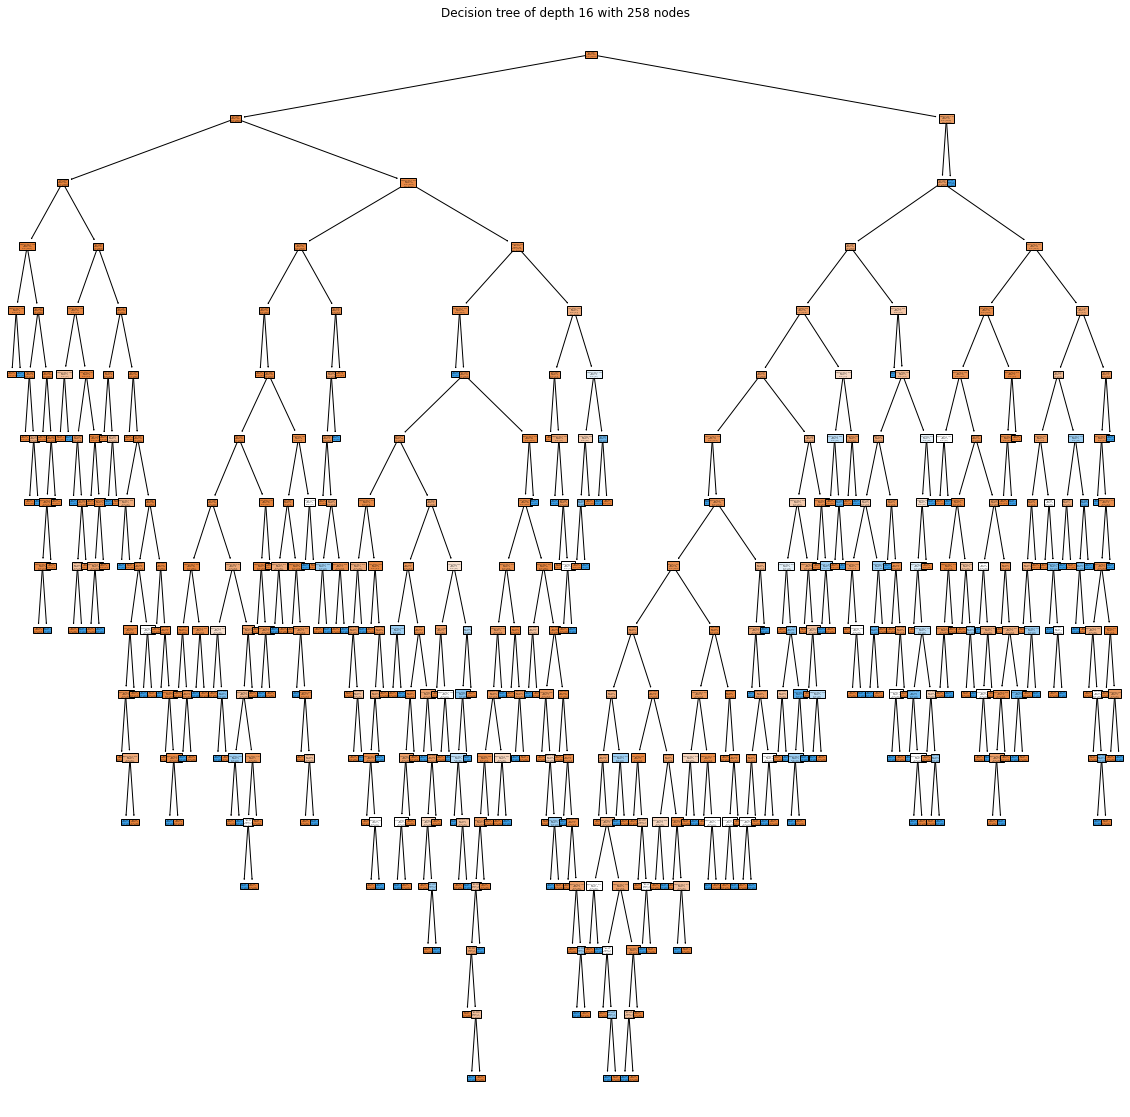

---------------------------------------------------------------------------------
Parameters of model DecisionTreeClassifier
ccp_alpha 0.0
class_weight None
criterion gini
max_depth None
max_features None
max_leaf_nodes None
min_impurity_decrease 0.0
min_samples_leaf 1
min_samples_split 2
min_weight_fraction_leaf 0.0
random_state 42
splitter best
-------------------------------------------------------------------


In [11]:
plot_decision_tree(TreeModel1 , feature_names)

In [12]:
def train_and_evaluate_model(X_train, Y_train, X_test, Y_test):
    param_grid_tree = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10,11,12,13,14,15],
    'class_weight' : [None , {0:1 ,1:23}, {0:1,1:30},{0:1,1:40} , {0:1 ,1: 50}, {0:1 , 1:60}],
 
    
    }
    

    model = GridSearchCV(DecisionTreeClassifier(random_state=42),
             param_grid=param_grid_tree,
             cv=4,
             scoring='recall' ,
             verbose=5)
    model.fit(X_train, Y_train)
    print(model.best_params_)
    report_imbalanced(model.best_estimator_, X_train, Y_train,"training")
    report_imbalanced(model.best_estimator_, X_test, Y_test,"test")
    return model.best_estimator_

In [13]:
Model2 = train_and_evaluate_model(X_train , y_train, X_test, y_test)

Fitting 4 folds for each of 72 candidates, totalling 288 fits
[CV 1/4] END class_weight=None, criterion=gini, max_depth=10;, score=0.140 total time=   0.0s
[CV 2/4] END class_weight=None, criterion=gini, max_depth=10;, score=0.233 total time=   0.0s
[CV 3/4] END class_weight=None, criterion=gini, max_depth=10;, score=0.091 total time=   0.0s
[CV 4/4] END class_weight=None, criterion=gini, max_depth=10;, score=0.136 total time=   0.0s
[CV 1/4] END class_weight=None, criterion=gini, max_depth=11;, score=0.140 total time=   0.0s
[CV 2/4] END class_weight=None, criterion=gini, max_depth=11;, score=0.233 total time=   0.0s
[CV 3/4] END class_weight=None, criterion=gini, max_depth=11;, score=0.091 total time=   0.0s
[CV 4/4] END class_weight=None, criterion=gini, max_depth=11;, score=0.159 total time=   0.0s
[CV 1/4] END class_weight=None, criterion=gini, max_depth=12;, score=0.163 total time=   0.0s
[CV 2/4] END class_weight=None, criterion=gini, max_depth=12;, score=0.279 total time=   0.0

[CV 4/4] END class_weight={0: 1, 1: 23}, criterion=entropy, max_depth=12;, score=0.477 total time=   0.0s
[CV 1/4] END class_weight={0: 1, 1: 23}, criterion=entropy, max_depth=13;, score=0.372 total time=   0.0s
[CV 2/4] END class_weight={0: 1, 1: 23}, criterion=entropy, max_depth=13;, score=0.279 total time=   0.0s
[CV 3/4] END class_weight={0: 1, 1: 23}, criterion=entropy, max_depth=13;, score=0.205 total time=   0.0s
[CV 4/4] END class_weight={0: 1, 1: 23}, criterion=entropy, max_depth=13;, score=0.386 total time=   0.0s
[CV 1/4] END class_weight={0: 1, 1: 23}, criterion=entropy, max_depth=14;, score=0.302 total time=   0.0s
[CV 2/4] END class_weight={0: 1, 1: 23}, criterion=entropy, max_depth=14;, score=0.256 total time=   0.0s
[CV 3/4] END class_weight={0: 1, 1: 23}, criterion=entropy, max_depth=14;, score=0.159 total time=   0.0s
[CV 4/4] END class_weight={0: 1, 1: 23}, criterion=entropy, max_depth=14;, score=0.364 total time=   0.0s
[CV 1/4] END class_weight={0: 1, 1: 23}, crite

[CV 1/4] END class_weight={0: 1, 1: 40}, criterion=gini, max_depth=15;, score=0.279 total time=   0.0s
[CV 2/4] END class_weight={0: 1, 1: 40}, criterion=gini, max_depth=15;, score=0.233 total time=   0.0s
[CV 3/4] END class_weight={0: 1, 1: 40}, criterion=gini, max_depth=15;, score=0.114 total time=   0.0s
[CV 4/4] END class_weight={0: 1, 1: 40}, criterion=gini, max_depth=15;, score=0.318 total time=   0.0s
[CV 1/4] END class_weight={0: 1, 1: 40}, criterion=entropy, max_depth=10;, score=0.465 total time=   0.0s
[CV 2/4] END class_weight={0: 1, 1: 40}, criterion=entropy, max_depth=10;, score=0.326 total time=   0.0s
[CV 3/4] END class_weight={0: 1, 1: 40}, criterion=entropy, max_depth=10;, score=0.386 total time=   0.0s
[CV 4/4] END class_weight={0: 1, 1: 40}, criterion=entropy, max_depth=10;, score=0.568 total time=   0.0s
[CV 1/4] END class_weight={0: 1, 1: 40}, criterion=entropy, max_depth=11;, score=0.395 total time=   0.0s
[CV 2/4] END class_weight={0: 1, 1: 40}, criterion=entropy

[CV 1/4] END class_weight={0: 1, 1: 60}, criterion=gini, max_depth=12;, score=0.605 total time=   0.0s
[CV 2/4] END class_weight={0: 1, 1: 60}, criterion=gini, max_depth=12;, score=0.419 total time=   0.0s
[CV 3/4] END class_weight={0: 1, 1: 60}, criterion=gini, max_depth=12;, score=0.295 total time=   0.0s
[CV 4/4] END class_weight={0: 1, 1: 60}, criterion=gini, max_depth=12;, score=0.591 total time=   0.0s
[CV 1/4] END class_weight={0: 1, 1: 60}, criterion=gini, max_depth=13;, score=0.535 total time=   0.0s
[CV 2/4] END class_weight={0: 1, 1: 60}, criterion=gini, max_depth=13;, score=0.349 total time=   0.0s
[CV 3/4] END class_weight={0: 1, 1: 60}, criterion=gini, max_depth=13;, score=0.318 total time=   0.0s
[CV 4/4] END class_weight={0: 1, 1: 60}, criterion=gini, max_depth=13;, score=0.523 total time=   0.0s
[CV 1/4] END class_weight={0: 1, 1: 60}, criterion=gini, max_depth=14;, score=0.488 total time=   0.0s
[CV 2/4] END class_weight={0: 1, 1: 60}, criterion=gini, max_depth=14;, s

In [14]:

rus = RandomUnderSampler()
X_resampled, y_resampled = resample(rus, X_train, y_train)


Number of instances before resampling with RandomUnderSampler : dict_items([(0, 3402), (1, 174)]). 
Number of instances after  resampling with RandomUnderSampler : dict_items([(0, 174), (1, 174)]). 


In [15]:
def visualize(X, X_resampled, Y, Y_resampled, x_opacity=0.5):
    """
        x_opacity - [0, 1] -> prozirnost elemenata klase (podešavati u odnosu na to da li prikazujemo samo 1 klasu ili obe)
    """
    
    #Da bismo vizuelizovali, iskoristicemo PCA da smanjimo na 2 dimenzije
    
    pca = PCA(n_components=2)
    pca.fit(X)
    
    X_pca = pca.transform(X)
    X_resampled_pca = pca.transform(X_resampled) 
    
    X_stacked = [X_pca, X_resampled_pca]
    Y_stacked = [Y, y_resampled]
    
    fig = plt.figure(figsize=(20, 5))
    
    for i in range(2):
        ax = plt.subplot(1, 2, i + 1)
        colors = ['b' if y == 0 else 'r' for y in Y_stacked[i]]
        alpha = [x_opacity if y == 0 else 1 - x_opacity for y in Y_stacked[i]]
        plt.scatter(X_stacked[i][:, 0], X_stacked[i][:, 1], c=colors, alpha=alpha)
        plt.title('{} resampling'.format("After" if i else "Before"), c = 'blue' if i else 'green')
    plt.show()

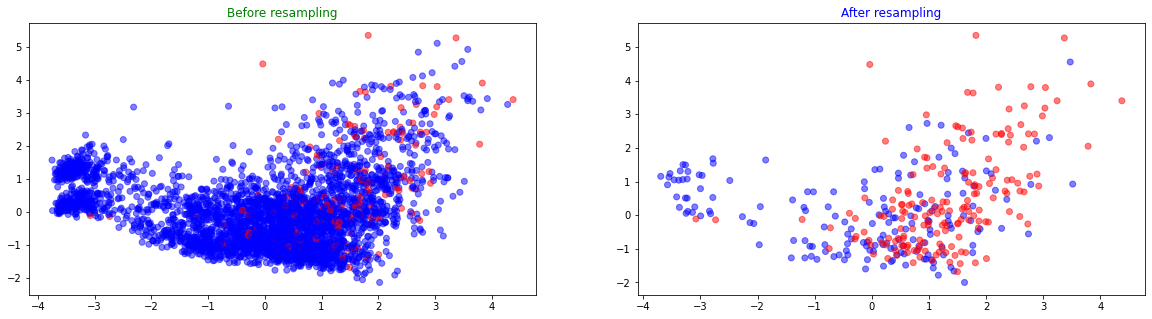

In [16]:
visualize(X_train, X_resampled, y_train, y_resampled)

In [17]:
train_and_evaluate_model(X_resampled, y_resampled, X_test, y_test)

Fitting 4 folds for each of 72 candidates, totalling 288 fits
[CV 1/4] END class_weight=None, criterion=gini, max_depth=10;, score=0.721 total time=   0.0s
[CV 2/4] END class_weight=None, criterion=gini, max_depth=10;, score=0.791 total time=   0.0s
[CV 3/4] END class_weight=None, criterion=gini, max_depth=10;, score=0.591 total time=   0.0s
[CV 4/4] END class_weight=None, criterion=gini, max_depth=10;, score=0.795 total time=   0.0s
[CV 1/4] END class_weight=None, criterion=gini, max_depth=11;, score=0.721 total time=   0.0s
[CV 2/4] END class_weight=None, criterion=gini, max_depth=11;, score=0.744 total time=   0.0s
[CV 3/4] END class_weight=None, criterion=gini, max_depth=11;, score=0.591 total time=   0.0s
[CV 4/4] END class_weight=None, criterion=gini, max_depth=11;, score=0.841 total time=   0.0s
[CV 1/4] END class_weight=None, criterion=gini, max_depth=12;, score=0.581 total time=   0.0s
[CV 2/4] END class_weight=None, criterion=gini, max_depth=12;, score=0.744 total time=   0.0

[CV 2/4] END class_weight={0: 1, 1: 23}, criterion=entropy, max_depth=15;, score=0.605 total time=   0.0s
[CV 3/4] END class_weight={0: 1, 1: 23}, criterion=entropy, max_depth=15;, score=0.568 total time=   0.0s
[CV 4/4] END class_weight={0: 1, 1: 23}, criterion=entropy, max_depth=15;, score=0.705 total time=   0.0s
[CV 1/4] END class_weight={0: 1, 1: 30}, criterion=gini, max_depth=10;, score=0.791 total time=   0.0s
[CV 2/4] END class_weight={0: 1, 1: 30}, criterion=gini, max_depth=10;, score=0.860 total time=   0.0s
[CV 3/4] END class_weight={0: 1, 1: 30}, criterion=gini, max_depth=10;, score=0.750 total time=   0.0s
[CV 4/4] END class_weight={0: 1, 1: 30}, criterion=gini, max_depth=10;, score=0.727 total time=   0.0s
[CV 1/4] END class_weight={0: 1, 1: 30}, criterion=gini, max_depth=11;, score=0.721 total time=   0.0s
[CV 2/4] END class_weight={0: 1, 1: 30}, criterion=gini, max_depth=11;, score=0.860 total time=   0.0s
[CV 3/4] END class_weight={0: 1, 1: 30}, criterion=gini, max_dep

[CV 4/4] END class_weight={0: 1, 1: 40}, criterion=entropy, max_depth=12;, score=0.795 total time=   0.0s
[CV 1/4] END class_weight={0: 1, 1: 40}, criterion=entropy, max_depth=13;, score=0.791 total time=   0.0s
[CV 2/4] END class_weight={0: 1, 1: 40}, criterion=entropy, max_depth=13;, score=0.698 total time=   0.0s
[CV 3/4] END class_weight={0: 1, 1: 40}, criterion=entropy, max_depth=13;, score=0.523 total time=   0.0s
[CV 4/4] END class_weight={0: 1, 1: 40}, criterion=entropy, max_depth=13;, score=0.773 total time=   0.0s
[CV 1/4] END class_weight={0: 1, 1: 40}, criterion=entropy, max_depth=14;, score=0.767 total time=   0.0s
[CV 2/4] END class_weight={0: 1, 1: 40}, criterion=entropy, max_depth=14;, score=0.651 total time=   0.0s
[CV 3/4] END class_weight={0: 1, 1: 40}, criterion=entropy, max_depth=14;, score=0.568 total time=   0.0s
[CV 4/4] END class_weight={0: 1, 1: 40}, criterion=entropy, max_depth=14;, score=0.773 total time=   0.0s
[CV 1/4] END class_weight={0: 1, 1: 40}, crite

[CV 3/4] END class_weight={0: 1, 1: 60}, criterion=entropy, max_depth=12;, score=0.614 total time=   0.0s
[CV 4/4] END class_weight={0: 1, 1: 60}, criterion=entropy, max_depth=12;, score=0.795 total time=   0.0s
[CV 1/4] END class_weight={0: 1, 1: 60}, criterion=entropy, max_depth=13;, score=0.791 total time=   0.0s
[CV 2/4] END class_weight={0: 1, 1: 60}, criterion=entropy, max_depth=13;, score=0.698 total time=   0.0s
[CV 3/4] END class_weight={0: 1, 1: 60}, criterion=entropy, max_depth=13;, score=0.523 total time=   0.0s
[CV 4/4] END class_weight={0: 1, 1: 60}, criterion=entropy, max_depth=13;, score=0.773 total time=   0.0s
[CV 1/4] END class_weight={0: 1, 1: 60}, criterion=entropy, max_depth=14;, score=0.767 total time=   0.0s
[CV 2/4] END class_weight={0: 1, 1: 60}, criterion=entropy, max_depth=14;, score=0.651 total time=   0.0s
[CV 3/4] END class_weight={0: 1, 1: 60}, criterion=entropy, max_depth=14;, score=0.568 total time=   0.0s
[CV 4/4] END class_weight={0: 1, 1: 60}, crite

DecisionTreeClassifier(class_weight={0: 1, 1: 40}, max_depth=10,
                       random_state=42)

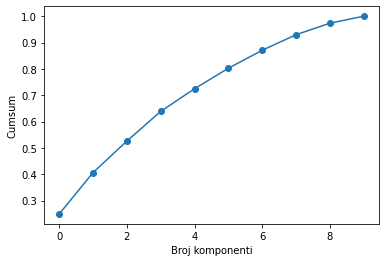

In [18]:

pca = PCA()

X_train_pca = pca.fit_transform(X_resampled)

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Broj komponenti')
plt.ylabel('Cumsum')
plt.show()

In [19]:
dtc_pca = Pipeline([
    ('pca', PCA()),
    ('model', DecisionTreeClassifier(random_state = 42) )
])
   

params = {
    'pca__n_components' : [3 ,4,5,6,7,8,9,10],
    'model__criterion' : ['gini', 'entropy'],
    'model__max_depth' : [10,11,12,13,14],
    'model__class_weight' : [None , {0:1 ,1:23}, {0:1,1:30},{0:1,1:40} , {0:1 ,1: 50}, {0:1 , 1:60}]
}
     

grid = GridSearchCV(dtc_pca, param_grid=params, scoring='recall', cv=4, verbose=5)
     

grid.fit(X_resampled, y_resampled)


Fitting 4 folds for each of 480 candidates, totalling 1920 fits
[CV 1/4] END model__class_weight=None, model__criterion=gini, model__max_depth=10, pca__n_components=3;, score=0.651 total time=   0.0s
[CV 2/4] END model__class_weight=None, model__criterion=gini, model__max_depth=10, pca__n_components=3;, score=0.605 total time=   0.0s
[CV 3/4] END model__class_weight=None, model__criterion=gini, model__max_depth=10, pca__n_components=3;, score=0.795 total time=   0.0s
[CV 4/4] END model__class_weight=None, model__criterion=gini, model__max_depth=10, pca__n_components=3;, score=0.568 total time=   0.0s
[CV 1/4] END model__class_weight=None, model__criterion=gini, model__max_depth=10, pca__n_components=4;, score=0.558 total time=   0.0s
[CV 2/4] END model__class_weight=None, model__criterion=gini, model__max_depth=10, pca__n_components=4;, score=0.605 total time=   0.0s
[CV 3/4] END model__class_weight=None, model__criterion=gini, model__max_depth=10, pca__n_components=4;, score=0.659 tot

[CV 1/4] END model__class_weight=None, model__criterion=gini, model__max_depth=12, pca__n_components=5;, score=0.535 total time=   0.0s
[CV 2/4] END model__class_weight=None, model__criterion=gini, model__max_depth=12, pca__n_components=5;, score=0.605 total time=   0.0s
[CV 3/4] END model__class_weight=None, model__criterion=gini, model__max_depth=12, pca__n_components=5;, score=0.841 total time=   0.0s
[CV 4/4] END model__class_weight=None, model__criterion=gini, model__max_depth=12, pca__n_components=5;, score=0.591 total time=   0.0s
[CV 1/4] END model__class_weight=None, model__criterion=gini, model__max_depth=12, pca__n_components=6;, score=0.419 total time=   0.0s
[CV 2/4] END model__class_weight=None, model__criterion=gini, model__max_depth=12, pca__n_components=6;, score=0.628 total time=   0.0s
[CV 3/4] END model__class_weight=None, model__criterion=gini, model__max_depth=12, pca__n_components=6;, score=0.705 total time=   0.0s
[CV 4/4] END model__class_weight=None, model__cr

[CV 2/4] END model__class_weight=None, model__criterion=gini, model__max_depth=14, pca__n_components=5;, score=0.605 total time=   0.0s
[CV 3/4] END model__class_weight=None, model__criterion=gini, model__max_depth=14, pca__n_components=5;, score=0.773 total time=   0.0s
[CV 4/4] END model__class_weight=None, model__criterion=gini, model__max_depth=14, pca__n_components=5;, score=0.568 total time=   0.0s
[CV 1/4] END model__class_weight=None, model__criterion=gini, model__max_depth=14, pca__n_components=6;, score=0.419 total time=   0.0s
[CV 2/4] END model__class_weight=None, model__criterion=gini, model__max_depth=14, pca__n_components=6;, score=0.605 total time=   0.0s
[CV 3/4] END model__class_weight=None, model__criterion=gini, model__max_depth=14, pca__n_components=6;, score=0.727 total time=   0.0s
[CV 4/4] END model__class_weight=None, model__criterion=gini, model__max_depth=14, pca__n_components=6;, score=0.500 total time=   0.0s
[CV 1/4] END model__class_weight=None, model__cr

[CV 1/4] END model__class_weight=None, model__criterion=entropy, model__max_depth=11, pca__n_components=8;, score=0.605 total time=   0.0s
[CV 2/4] END model__class_weight=None, model__criterion=entropy, model__max_depth=11, pca__n_components=8;, score=0.674 total time=   0.0s
[CV 3/4] END model__class_weight=None, model__criterion=entropy, model__max_depth=11, pca__n_components=8;, score=0.591 total time=   0.0s
[CV 4/4] END model__class_weight=None, model__criterion=entropy, model__max_depth=11, pca__n_components=8;, score=0.591 total time=   0.0s
[CV 1/4] END model__class_weight=None, model__criterion=entropy, model__max_depth=11, pca__n_components=9;, score=0.535 total time=   0.0s
[CV 2/4] END model__class_weight=None, model__criterion=entropy, model__max_depth=11, pca__n_components=9;, score=0.721 total time=   0.0s
[CV 3/4] END model__class_weight=None, model__criterion=entropy, model__max_depth=11, pca__n_components=9;, score=0.591 total time=   0.0s
[CV 4/4] END model__class_w

[CV 3/4] END model__class_weight=None, model__criterion=entropy, model__max_depth=13, pca__n_components=9;, score=0.614 total time=   0.0s
[CV 4/4] END model__class_weight=None, model__criterion=entropy, model__max_depth=13, pca__n_components=9;, score=0.614 total time=   0.0s
[CV 1/4] END model__class_weight=None, model__criterion=entropy, model__max_depth=13, pca__n_components=10;, score=0.674 total time=   0.0s
[CV 2/4] END model__class_weight=None, model__criterion=entropy, model__max_depth=13, pca__n_components=10;, score=0.605 total time=   0.0s
[CV 3/4] END model__class_weight=None, model__criterion=entropy, model__max_depth=13, pca__n_components=10;, score=0.705 total time=   0.0s
[CV 4/4] END model__class_weight=None, model__criterion=entropy, model__max_depth=13, pca__n_components=10;, score=0.636 total time=   0.0s
[CV 1/4] END model__class_weight=None, model__criterion=entropy, model__max_depth=14, pca__n_components=3;, score=0.558 total time=   0.0s
[CV 2/4] END model__cla

[CV 1/4] END model__class_weight={0: 1, 1: 23}, model__criterion=gini, model__max_depth=11, pca__n_components=3;, score=0.767 total time=   0.0s
[CV 2/4] END model__class_weight={0: 1, 1: 23}, model__criterion=gini, model__max_depth=11, pca__n_components=3;, score=0.721 total time=   0.0s
[CV 3/4] END model__class_weight={0: 1, 1: 23}, model__criterion=gini, model__max_depth=11, pca__n_components=3;, score=0.864 total time=   0.0s
[CV 4/4] END model__class_weight={0: 1, 1: 23}, model__criterion=gini, model__max_depth=11, pca__n_components=3;, score=0.705 total time=   0.0s
[CV 1/4] END model__class_weight={0: 1, 1: 23}, model__criterion=gini, model__max_depth=11, pca__n_components=4;, score=0.721 total time=   0.0s
[CV 2/4] END model__class_weight={0: 1, 1: 23}, model__criterion=gini, model__max_depth=11, pca__n_components=4;, score=0.605 total time=   0.0s
[CV 3/4] END model__class_weight={0: 1, 1: 23}, model__criterion=gini, model__max_depth=11, pca__n_components=4;, score=0.909 tota

[CV 4/4] END model__class_weight={0: 1, 1: 23}, model__criterion=gini, model__max_depth=12, pca__n_components=9;, score=0.750 total time=   0.0s
[CV 1/4] END model__class_weight={0: 1, 1: 23}, model__criterion=gini, model__max_depth=12, pca__n_components=10;, score=0.814 total time=   0.0s
[CV 2/4] END model__class_weight={0: 1, 1: 23}, model__criterion=gini, model__max_depth=12, pca__n_components=10;, score=0.814 total time=   0.0s
[CV 3/4] END model__class_weight={0: 1, 1: 23}, model__criterion=gini, model__max_depth=12, pca__n_components=10;, score=0.864 total time=   0.0s
[CV 4/4] END model__class_weight={0: 1, 1: 23}, model__criterion=gini, model__max_depth=12, pca__n_components=10;, score=0.773 total time=   0.0s
[CV 1/4] END model__class_weight={0: 1, 1: 23}, model__criterion=gini, model__max_depth=13, pca__n_components=3;, score=0.698 total time=   0.0s
[CV 2/4] END model__class_weight={0: 1, 1: 23}, model__criterion=gini, model__max_depth=13, pca__n_components=3;, score=0.744 

[CV 3/4] END model__class_weight={0: 1, 1: 23}, model__criterion=gini, model__max_depth=14, pca__n_components=8;, score=0.682 total time=   0.0s
[CV 4/4] END model__class_weight={0: 1, 1: 23}, model__criterion=gini, model__max_depth=14, pca__n_components=8;, score=0.636 total time=   0.0s
[CV 1/4] END model__class_weight={0: 1, 1: 23}, model__criterion=gini, model__max_depth=14, pca__n_components=9;, score=0.744 total time=   0.0s
[CV 2/4] END model__class_weight={0: 1, 1: 23}, model__criterion=gini, model__max_depth=14, pca__n_components=9;, score=0.628 total time=   0.0s
[CV 3/4] END model__class_weight={0: 1, 1: 23}, model__criterion=gini, model__max_depth=14, pca__n_components=9;, score=0.659 total time=   0.0s
[CV 4/4] END model__class_weight={0: 1, 1: 23}, model__criterion=gini, model__max_depth=14, pca__n_components=9;, score=0.682 total time=   0.0s
[CV 1/4] END model__class_weight={0: 1, 1: 23}, model__criterion=gini, model__max_depth=14, pca__n_components=10;, score=0.814 tot

[CV 2/4] END model__class_weight={0: 1, 1: 23}, model__criterion=entropy, model__max_depth=11, pca__n_components=7;, score=0.744 total time=   0.0s
[CV 3/4] END model__class_weight={0: 1, 1: 23}, model__criterion=entropy, model__max_depth=11, pca__n_components=7;, score=0.864 total time=   0.0s
[CV 4/4] END model__class_weight={0: 1, 1: 23}, model__criterion=entropy, model__max_depth=11, pca__n_components=7;, score=0.773 total time=   0.0s
[CV 1/4] END model__class_weight={0: 1, 1: 23}, model__criterion=entropy, model__max_depth=11, pca__n_components=8;, score=0.767 total time=   0.0s
[CV 2/4] END model__class_weight={0: 1, 1: 23}, model__criterion=entropy, model__max_depth=11, pca__n_components=8;, score=0.791 total time=   0.0s
[CV 3/4] END model__class_weight={0: 1, 1: 23}, model__criterion=entropy, model__max_depth=11, pca__n_components=8;, score=0.818 total time=   0.0s
[CV 4/4] END model__class_weight={0: 1, 1: 23}, model__criterion=entropy, model__max_depth=11, pca__n_components

[CV 1/4] END model__class_weight={0: 1, 1: 23}, model__criterion=entropy, model__max_depth=13, pca__n_components=6;, score=0.674 total time=   0.0s
[CV 2/4] END model__class_weight={0: 1, 1: 23}, model__criterion=entropy, model__max_depth=13, pca__n_components=6;, score=0.791 total time=   0.0s
[CV 3/4] END model__class_weight={0: 1, 1: 23}, model__criterion=entropy, model__max_depth=13, pca__n_components=6;, score=0.818 total time=   0.0s
[CV 4/4] END model__class_weight={0: 1, 1: 23}, model__criterion=entropy, model__max_depth=13, pca__n_components=6;, score=0.727 total time=   0.0s
[CV 1/4] END model__class_weight={0: 1, 1: 23}, model__criterion=entropy, model__max_depth=13, pca__n_components=7;, score=0.581 total time=   0.0s
[CV 2/4] END model__class_weight={0: 1, 1: 23}, model__criterion=entropy, model__max_depth=13, pca__n_components=7;, score=0.744 total time=   0.0s
[CV 3/4] END model__class_weight={0: 1, 1: 23}, model__criterion=entropy, model__max_depth=13, pca__n_components

[CV 2/4] END model__class_weight={0: 1, 1: 30}, model__criterion=gini, model__max_depth=10, pca__n_components=7;, score=0.837 total time=   0.0s
[CV 3/4] END model__class_weight={0: 1, 1: 30}, model__criterion=gini, model__max_depth=10, pca__n_components=7;, score=0.864 total time=   0.0s
[CV 4/4] END model__class_weight={0: 1, 1: 30}, model__criterion=gini, model__max_depth=10, pca__n_components=7;, score=0.864 total time=   0.0s
[CV 1/4] END model__class_weight={0: 1, 1: 30}, model__criterion=gini, model__max_depth=10, pca__n_components=8;, score=0.860 total time=   0.0s
[CV 2/4] END model__class_weight={0: 1, 1: 30}, model__criterion=gini, model__max_depth=10, pca__n_components=8;, score=0.814 total time=   0.0s
[CV 3/4] END model__class_weight={0: 1, 1: 30}, model__criterion=gini, model__max_depth=10, pca__n_components=8;, score=0.841 total time=   0.0s
[CV 4/4] END model__class_weight={0: 1, 1: 30}, model__criterion=gini, model__max_depth=10, pca__n_components=8;, score=0.773 tota

[CV 2/4] END model__class_weight={0: 1, 1: 30}, model__criterion=gini, model__max_depth=12, pca__n_components=7;, score=0.791 total time=   0.0s
[CV 3/4] END model__class_weight={0: 1, 1: 30}, model__criterion=gini, model__max_depth=12, pca__n_components=7;, score=0.727 total time=   0.0s
[CV 4/4] END model__class_weight={0: 1, 1: 30}, model__criterion=gini, model__max_depth=12, pca__n_components=7;, score=0.818 total time=   0.0s
[CV 1/4] END model__class_weight={0: 1, 1: 30}, model__criterion=gini, model__max_depth=12, pca__n_components=8;, score=0.814 total time=   0.0s
[CV 2/4] END model__class_weight={0: 1, 1: 30}, model__criterion=gini, model__max_depth=12, pca__n_components=8;, score=0.767 total time=   0.0s
[CV 3/4] END model__class_weight={0: 1, 1: 30}, model__criterion=gini, model__max_depth=12, pca__n_components=8;, score=0.705 total time=   0.0s
[CV 4/4] END model__class_weight={0: 1, 1: 30}, model__criterion=gini, model__max_depth=12, pca__n_components=8;, score=0.659 tota

[CV 2/4] END model__class_weight={0: 1, 1: 30}, model__criterion=gini, model__max_depth=14, pca__n_components=8;, score=0.628 total time=   0.0s
[CV 3/4] END model__class_weight={0: 1, 1: 30}, model__criterion=gini, model__max_depth=14, pca__n_components=8;, score=0.682 total time=   0.0s
[CV 4/4] END model__class_weight={0: 1, 1: 30}, model__criterion=gini, model__max_depth=14, pca__n_components=8;, score=0.636 total time=   0.0s
[CV 1/4] END model__class_weight={0: 1, 1: 30}, model__criterion=gini, model__max_depth=14, pca__n_components=9;, score=0.744 total time=   0.0s
[CV 2/4] END model__class_weight={0: 1, 1: 30}, model__criterion=gini, model__max_depth=14, pca__n_components=9;, score=0.721 total time=   0.0s
[CV 3/4] END model__class_weight={0: 1, 1: 30}, model__criterion=gini, model__max_depth=14, pca__n_components=9;, score=0.614 total time=   0.0s
[CV 4/4] END model__class_weight={0: 1, 1: 30}, model__criterion=gini, model__max_depth=14, pca__n_components=9;, score=0.659 tota

[CV 3/4] END model__class_weight={0: 1, 1: 30}, model__criterion=entropy, model__max_depth=11, pca__n_components=6;, score=0.841 total time=   0.0s
[CV 4/4] END model__class_weight={0: 1, 1: 30}, model__criterion=entropy, model__max_depth=11, pca__n_components=6;, score=0.795 total time=   0.0s
[CV 1/4] END model__class_weight={0: 1, 1: 30}, model__criterion=entropy, model__max_depth=11, pca__n_components=7;, score=0.628 total time=   0.0s
[CV 2/4] END model__class_weight={0: 1, 1: 30}, model__criterion=entropy, model__max_depth=11, pca__n_components=7;, score=0.744 total time=   0.0s
[CV 3/4] END model__class_weight={0: 1, 1: 30}, model__criterion=entropy, model__max_depth=11, pca__n_components=7;, score=0.886 total time=   0.0s
[CV 4/4] END model__class_weight={0: 1, 1: 30}, model__criterion=entropy, model__max_depth=11, pca__n_components=7;, score=0.773 total time=   0.0s
[CV 1/4] END model__class_weight={0: 1, 1: 30}, model__criterion=entropy, model__max_depth=11, pca__n_components

[CV 3/4] END model__class_weight={0: 1, 1: 30}, model__criterion=entropy, model__max_depth=13, pca__n_components=7;, score=0.818 total time=   0.0s
[CV 4/4] END model__class_weight={0: 1, 1: 30}, model__criterion=entropy, model__max_depth=13, pca__n_components=7;, score=0.750 total time=   0.0s
[CV 1/4] END model__class_weight={0: 1, 1: 30}, model__criterion=entropy, model__max_depth=13, pca__n_components=8;, score=0.721 total time=   0.0s
[CV 2/4] END model__class_weight={0: 1, 1: 30}, model__criterion=entropy, model__max_depth=13, pca__n_components=8;, score=0.767 total time=   0.0s
[CV 3/4] END model__class_weight={0: 1, 1: 30}, model__criterion=entropy, model__max_depth=13, pca__n_components=8;, score=0.773 total time=   0.0s
[CV 4/4] END model__class_weight={0: 1, 1: 30}, model__criterion=entropy, model__max_depth=13, pca__n_components=8;, score=0.773 total time=   0.0s
[CV 1/4] END model__class_weight={0: 1, 1: 30}, model__criterion=entropy, model__max_depth=13, pca__n_components

[CV 1/4] END model__class_weight={0: 1, 1: 40}, model__criterion=gini, model__max_depth=10, pca__n_components=8;, score=0.860 total time=   0.0s
[CV 2/4] END model__class_weight={0: 1, 1: 40}, model__criterion=gini, model__max_depth=10, pca__n_components=8;, score=0.814 total time=   0.0s
[CV 3/4] END model__class_weight={0: 1, 1: 40}, model__criterion=gini, model__max_depth=10, pca__n_components=8;, score=0.886 total time=   0.0s
[CV 4/4] END model__class_weight={0: 1, 1: 40}, model__criterion=gini, model__max_depth=10, pca__n_components=8;, score=0.727 total time=   0.0s
[CV 1/4] END model__class_weight={0: 1, 1: 40}, model__criterion=gini, model__max_depth=10, pca__n_components=9;, score=0.814 total time=   0.0s
[CV 2/4] END model__class_weight={0: 1, 1: 40}, model__criterion=gini, model__max_depth=10, pca__n_components=9;, score=0.884 total time=   0.0s
[CV 3/4] END model__class_weight={0: 1, 1: 40}, model__criterion=gini, model__max_depth=10, pca__n_components=9;, score=0.841 tota

[CV 4/4] END model__class_weight={0: 1, 1: 40}, model__criterion=gini, model__max_depth=12, pca__n_components=6;, score=0.773 total time=   0.0s
[CV 1/4] END model__class_weight={0: 1, 1: 40}, model__criterion=gini, model__max_depth=12, pca__n_components=7;, score=0.814 total time=   0.0s
[CV 2/4] END model__class_weight={0: 1, 1: 40}, model__criterion=gini, model__max_depth=12, pca__n_components=7;, score=0.791 total time=   0.0s
[CV 3/4] END model__class_weight={0: 1, 1: 40}, model__criterion=gini, model__max_depth=12, pca__n_components=7;, score=0.795 total time=   0.0s
[CV 4/4] END model__class_weight={0: 1, 1: 40}, model__criterion=gini, model__max_depth=12, pca__n_components=7;, score=0.727 total time=   0.0s
[CV 1/4] END model__class_weight={0: 1, 1: 40}, model__criterion=gini, model__max_depth=12, pca__n_components=8;, score=0.814 total time=   0.0s
[CV 2/4] END model__class_weight={0: 1, 1: 40}, model__criterion=gini, model__max_depth=12, pca__n_components=8;, score=0.767 tota

[CV 2/4] END model__class_weight={0: 1, 1: 40}, model__criterion=gini, model__max_depth=14, pca__n_components=7;, score=0.698 total time=   0.0s
[CV 3/4] END model__class_weight={0: 1, 1: 40}, model__criterion=gini, model__max_depth=14, pca__n_components=7;, score=0.727 total time=   0.0s
[CV 4/4] END model__class_weight={0: 1, 1: 40}, model__criterion=gini, model__max_depth=14, pca__n_components=7;, score=0.636 total time=   0.0s
[CV 1/4] END model__class_weight={0: 1, 1: 40}, model__criterion=gini, model__max_depth=14, pca__n_components=8;, score=0.767 total time=   0.0s
[CV 2/4] END model__class_weight={0: 1, 1: 40}, model__criterion=gini, model__max_depth=14, pca__n_components=8;, score=0.628 total time=   0.0s
[CV 3/4] END model__class_weight={0: 1, 1: 40}, model__criterion=gini, model__max_depth=14, pca__n_components=8;, score=0.705 total time=   0.0s
[CV 4/4] END model__class_weight={0: 1, 1: 40}, model__criterion=gini, model__max_depth=14, pca__n_components=8;, score=0.705 tota

[CV 1/4] END model__class_weight={0: 1, 1: 40}, model__criterion=entropy, model__max_depth=11, pca__n_components=7;, score=0.767 total time=   0.0s
[CV 2/4] END model__class_weight={0: 1, 1: 40}, model__criterion=entropy, model__max_depth=11, pca__n_components=7;, score=0.744 total time=   0.0s
[CV 3/4] END model__class_weight={0: 1, 1: 40}, model__criterion=entropy, model__max_depth=11, pca__n_components=7;, score=0.841 total time=   0.0s
[CV 4/4] END model__class_weight={0: 1, 1: 40}, model__criterion=entropy, model__max_depth=11, pca__n_components=7;, score=0.773 total time=   0.0s
[CV 1/4] END model__class_weight={0: 1, 1: 40}, model__criterion=entropy, model__max_depth=11, pca__n_components=8;, score=0.767 total time=   0.0s
[CV 2/4] END model__class_weight={0: 1, 1: 40}, model__criterion=entropy, model__max_depth=11, pca__n_components=8;, score=0.791 total time=   0.0s
[CV 3/4] END model__class_weight={0: 1, 1: 40}, model__criterion=entropy, model__max_depth=11, pca__n_components

[CV 1/4] END model__class_weight={0: 1, 1: 40}, model__criterion=entropy, model__max_depth=13, pca__n_components=5;, score=0.674 total time=   0.0s
[CV 2/4] END model__class_weight={0: 1, 1: 40}, model__criterion=entropy, model__max_depth=13, pca__n_components=5;, score=0.698 total time=   0.0s
[CV 3/4] END model__class_weight={0: 1, 1: 40}, model__criterion=entropy, model__max_depth=13, pca__n_components=5;, score=0.886 total time=   0.0s
[CV 4/4] END model__class_weight={0: 1, 1: 40}, model__criterion=entropy, model__max_depth=13, pca__n_components=5;, score=0.682 total time=   0.0s
[CV 1/4] END model__class_weight={0: 1, 1: 40}, model__criterion=entropy, model__max_depth=13, pca__n_components=6;, score=0.558 total time=   0.0s
[CV 2/4] END model__class_weight={0: 1, 1: 40}, model__criterion=entropy, model__max_depth=13, pca__n_components=6;, score=0.791 total time=   0.0s
[CV 3/4] END model__class_weight={0: 1, 1: 40}, model__criterion=entropy, model__max_depth=13, pca__n_components

[CV 1/4] END model__class_weight={0: 1, 1: 50}, model__criterion=gini, model__max_depth=10, pca__n_components=3;, score=0.791 total time=   0.0s
[CV 2/4] END model__class_weight={0: 1, 1: 50}, model__criterion=gini, model__max_depth=10, pca__n_components=3;, score=0.767 total time=   0.0s
[CV 3/4] END model__class_weight={0: 1, 1: 50}, model__criterion=gini, model__max_depth=10, pca__n_components=3;, score=0.932 total time=   0.0s
[CV 4/4] END model__class_weight={0: 1, 1: 50}, model__criterion=gini, model__max_depth=10, pca__n_components=3;, score=0.727 total time=   0.0s
[CV 1/4] END model__class_weight={0: 1, 1: 50}, model__criterion=gini, model__max_depth=10, pca__n_components=4;, score=0.721 total time=   0.0s
[CV 2/4] END model__class_weight={0: 1, 1: 50}, model__criterion=gini, model__max_depth=10, pca__n_components=4;, score=0.860 total time=   0.0s
[CV 3/4] END model__class_weight={0: 1, 1: 50}, model__criterion=gini, model__max_depth=10, pca__n_components=4;, score=0.955 tota

[CV 1/4] END model__class_weight={0: 1, 1: 50}, model__criterion=gini, model__max_depth=11, pca__n_components=10;, score=0.814 total time=   0.0s
[CV 2/4] END model__class_weight={0: 1, 1: 50}, model__criterion=gini, model__max_depth=11, pca__n_components=10;, score=0.930 total time=   0.0s
[CV 3/4] END model__class_weight={0: 1, 1: 50}, model__criterion=gini, model__max_depth=11, pca__n_components=10;, score=0.886 total time=   0.0s
[CV 4/4] END model__class_weight={0: 1, 1: 50}, model__criterion=gini, model__max_depth=11, pca__n_components=10;, score=0.864 total time=   0.0s
[CV 1/4] END model__class_weight={0: 1, 1: 50}, model__criterion=gini, model__max_depth=12, pca__n_components=3;, score=0.698 total time=   0.0s
[CV 2/4] END model__class_weight={0: 1, 1: 50}, model__criterion=gini, model__max_depth=12, pca__n_components=3;, score=0.721 total time=   0.0s
[CV 3/4] END model__class_weight={0: 1, 1: 50}, model__criterion=gini, model__max_depth=12, pca__n_components=3;, score=0.864 

[CV 3/4] END model__class_weight={0: 1, 1: 50}, model__criterion=gini, model__max_depth=13, pca__n_components=9;, score=0.750 total time=   0.0s
[CV 4/4] END model__class_weight={0: 1, 1: 50}, model__criterion=gini, model__max_depth=13, pca__n_components=9;, score=0.705 total time=   0.0s
[CV 1/4] END model__class_weight={0: 1, 1: 50}, model__criterion=gini, model__max_depth=13, pca__n_components=10;, score=0.814 total time=   0.0s
[CV 2/4] END model__class_weight={0: 1, 1: 50}, model__criterion=gini, model__max_depth=13, pca__n_components=10;, score=0.884 total time=   0.0s
[CV 3/4] END model__class_weight={0: 1, 1: 50}, model__criterion=gini, model__max_depth=13, pca__n_components=10;, score=0.864 total time=   0.0s
[CV 4/4] END model__class_weight={0: 1, 1: 50}, model__criterion=gini, model__max_depth=13, pca__n_components=10;, score=0.773 total time=   0.0s
[CV 1/4] END model__class_weight={0: 1, 1: 50}, model__criterion=gini, model__max_depth=14, pca__n_components=3;, score=0.628 

[CV 3/4] END model__class_weight={0: 1, 1: 50}, model__criterion=entropy, model__max_depth=10, pca__n_components=8;, score=0.864 total time=   0.0s
[CV 4/4] END model__class_weight={0: 1, 1: 50}, model__criterion=entropy, model__max_depth=10, pca__n_components=8;, score=0.795 total time=   0.0s
[CV 1/4] END model__class_weight={0: 1, 1: 50}, model__criterion=entropy, model__max_depth=10, pca__n_components=9;, score=0.814 total time=   0.0s
[CV 2/4] END model__class_weight={0: 1, 1: 50}, model__criterion=entropy, model__max_depth=10, pca__n_components=9;, score=0.814 total time=   0.0s
[CV 3/4] END model__class_weight={0: 1, 1: 50}, model__criterion=entropy, model__max_depth=10, pca__n_components=9;, score=0.795 total time=   0.0s
[CV 4/4] END model__class_weight={0: 1, 1: 50}, model__criterion=entropy, model__max_depth=10, pca__n_components=9;, score=0.773 total time=   0.0s
[CV 1/4] END model__class_weight={0: 1, 1: 50}, model__criterion=entropy, model__max_depth=10, pca__n_components

[CV 3/4] END model__class_weight={0: 1, 1: 50}, model__criterion=entropy, model__max_depth=12, pca__n_components=7;, score=0.818 total time=   0.0s
[CV 4/4] END model__class_weight={0: 1, 1: 50}, model__criterion=entropy, model__max_depth=12, pca__n_components=7;, score=0.773 total time=   0.0s
[CV 1/4] END model__class_weight={0: 1, 1: 50}, model__criterion=entropy, model__max_depth=12, pca__n_components=8;, score=0.744 total time=   0.0s
[CV 2/4] END model__class_weight={0: 1, 1: 50}, model__criterion=entropy, model__max_depth=12, pca__n_components=8;, score=0.791 total time=   0.0s
[CV 3/4] END model__class_weight={0: 1, 1: 50}, model__criterion=entropy, model__max_depth=12, pca__n_components=8;, score=0.795 total time=   0.0s
[CV 4/4] END model__class_weight={0: 1, 1: 50}, model__criterion=entropy, model__max_depth=12, pca__n_components=8;, score=0.795 total time=   0.0s
[CV 1/4] END model__class_weight={0: 1, 1: 50}, model__criterion=entropy, model__max_depth=12, pca__n_components

[CV 2/4] END model__class_weight={0: 1, 1: 50}, model__criterion=entropy, model__max_depth=14, pca__n_components=6;, score=0.791 total time=   0.0s
[CV 3/4] END model__class_weight={0: 1, 1: 50}, model__criterion=entropy, model__max_depth=14, pca__n_components=6;, score=0.795 total time=   0.0s
[CV 4/4] END model__class_weight={0: 1, 1: 50}, model__criterion=entropy, model__max_depth=14, pca__n_components=6;, score=0.682 total time=   0.0s
[CV 1/4] END model__class_weight={0: 1, 1: 50}, model__criterion=entropy, model__max_depth=14, pca__n_components=7;, score=0.512 total time=   0.0s
[CV 2/4] END model__class_weight={0: 1, 1: 50}, model__criterion=entropy, model__max_depth=14, pca__n_components=7;, score=0.744 total time=   0.0s
[CV 3/4] END model__class_weight={0: 1, 1: 50}, model__criterion=entropy, model__max_depth=14, pca__n_components=7;, score=0.818 total time=   0.0s
[CV 4/4] END model__class_weight={0: 1, 1: 50}, model__criterion=entropy, model__max_depth=14, pca__n_components

[CV 3/4] END model__class_weight={0: 1, 1: 60}, model__criterion=gini, model__max_depth=11, pca__n_components=5;, score=0.841 total time=   0.0s
[CV 4/4] END model__class_weight={0: 1, 1: 60}, model__criterion=gini, model__max_depth=11, pca__n_components=5;, score=0.659 total time=   0.0s
[CV 1/4] END model__class_weight={0: 1, 1: 60}, model__criterion=gini, model__max_depth=11, pca__n_components=6;, score=0.767 total time=   0.0s
[CV 2/4] END model__class_weight={0: 1, 1: 60}, model__criterion=gini, model__max_depth=11, pca__n_components=6;, score=0.767 total time=   0.0s
[CV 3/4] END model__class_weight={0: 1, 1: 60}, model__criterion=gini, model__max_depth=11, pca__n_components=6;, score=0.818 total time=   0.0s
[CV 4/4] END model__class_weight={0: 1, 1: 60}, model__criterion=gini, model__max_depth=11, pca__n_components=6;, score=0.841 total time=   0.0s
[CV 1/4] END model__class_weight={0: 1, 1: 60}, model__criterion=gini, model__max_depth=11, pca__n_components=7;, score=0.837 tota

[CV 4/4] END model__class_weight={0: 1, 1: 60}, model__criterion=gini, model__max_depth=13, pca__n_components=4;, score=0.682 total time=   0.0s
[CV 1/4] END model__class_weight={0: 1, 1: 60}, model__criterion=gini, model__max_depth=13, pca__n_components=5;, score=0.674 total time=   0.0s
[CV 2/4] END model__class_weight={0: 1, 1: 60}, model__criterion=gini, model__max_depth=13, pca__n_components=5;, score=0.651 total time=   0.0s
[CV 3/4] END model__class_weight={0: 1, 1: 60}, model__criterion=gini, model__max_depth=13, pca__n_components=5;, score=0.750 total time=   0.0s
[CV 4/4] END model__class_weight={0: 1, 1: 60}, model__criterion=gini, model__max_depth=13, pca__n_components=5;, score=0.591 total time=   0.0s
[CV 1/4] END model__class_weight={0: 1, 1: 60}, model__criterion=gini, model__max_depth=13, pca__n_components=6;, score=0.698 total time=   0.0s
[CV 2/4] END model__class_weight={0: 1, 1: 60}, model__criterion=gini, model__max_depth=13, pca__n_components=6;, score=0.721 tota

[CV 3/4] END model__class_weight={0: 1, 1: 60}, model__criterion=entropy, model__max_depth=10, pca__n_components=3;, score=0.932 total time=   0.0s
[CV 4/4] END model__class_weight={0: 1, 1: 60}, model__criterion=entropy, model__max_depth=10, pca__n_components=3;, score=0.818 total time=   0.0s
[CV 1/4] END model__class_weight={0: 1, 1: 60}, model__criterion=entropy, model__max_depth=10, pca__n_components=4;, score=0.767 total time=   0.0s
[CV 2/4] END model__class_weight={0: 1, 1: 60}, model__criterion=entropy, model__max_depth=10, pca__n_components=4;, score=0.744 total time=   0.0s
[CV 3/4] END model__class_weight={0: 1, 1: 60}, model__criterion=entropy, model__max_depth=10, pca__n_components=4;, score=0.864 total time=   0.0s
[CV 4/4] END model__class_weight={0: 1, 1: 60}, model__criterion=entropy, model__max_depth=10, pca__n_components=4;, score=0.795 total time=   0.0s
[CV 1/4] END model__class_weight={0: 1, 1: 60}, model__criterion=entropy, model__max_depth=10, pca__n_components

[CV 1/4] END model__class_weight={0: 1, 1: 60}, model__criterion=entropy, model__max_depth=12, pca__n_components=4;, score=0.698 total time=   0.0s
[CV 2/4] END model__class_weight={0: 1, 1: 60}, model__criterion=entropy, model__max_depth=12, pca__n_components=4;, score=0.721 total time=   0.0s
[CV 3/4] END model__class_weight={0: 1, 1: 60}, model__criterion=entropy, model__max_depth=12, pca__n_components=4;, score=0.841 total time=   0.0s
[CV 4/4] END model__class_weight={0: 1, 1: 60}, model__criterion=entropy, model__max_depth=12, pca__n_components=4;, score=0.750 total time=   0.0s
[CV 1/4] END model__class_weight={0: 1, 1: 60}, model__criterion=entropy, model__max_depth=12, pca__n_components=5;, score=0.698 total time=   0.0s
[CV 2/4] END model__class_weight={0: 1, 1: 60}, model__criterion=entropy, model__max_depth=12, pca__n_components=5;, score=0.674 total time=   0.0s
[CV 3/4] END model__class_weight={0: 1, 1: 60}, model__criterion=entropy, model__max_depth=12, pca__n_components

[CV 3/4] END model__class_weight={0: 1, 1: 60}, model__criterion=entropy, model__max_depth=13, pca__n_components=10;, score=0.705 total time=   0.0s
[CV 4/4] END model__class_weight={0: 1, 1: 60}, model__criterion=entropy, model__max_depth=13, pca__n_components=10;, score=0.705 total time=   0.0s
[CV 1/4] END model__class_weight={0: 1, 1: 60}, model__criterion=entropy, model__max_depth=14, pca__n_components=3;, score=0.674 total time=   0.0s
[CV 2/4] END model__class_weight={0: 1, 1: 60}, model__criterion=entropy, model__max_depth=14, pca__n_components=3;, score=0.674 total time=   0.0s
[CV 3/4] END model__class_weight={0: 1, 1: 60}, model__criterion=entropy, model__max_depth=14, pca__n_components=3;, score=0.864 total time=   0.0s
[CV 4/4] END model__class_weight={0: 1, 1: 60}, model__criterion=entropy, model__max_depth=14, pca__n_components=3;, score=0.682 total time=   0.0s
[CV 1/4] END model__class_weight={0: 1, 1: 60}, model__criterion=entropy, model__max_depth=14, pca__n_componen

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('model',
                                        DecisionTreeClassifier(random_state=42))]),
             param_grid={'model__class_weight': [None, {0: 1, 1: 23},
                                                 {0: 1, 1: 30}, {0: 1, 1: 40},
                                                 {0: 1, 1: 50}, {0: 1, 1: 60}],
                         'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': [10, 11, 12, 13, 14],
                         'pca__n_components': [3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='recall', verbose=5)

In [20]:
grid.best_params_

{'model__class_weight': {0: 1, 1: 40},
 'model__criterion': 'gini',
 'model__max_depth': 10,
 'pca__n_components': 10}

In [21]:
report_imbalanced(grid.best_estimator_,X_test , y_test, "test")

Classification report for model Pipeline on test data
---------------------------------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.41      0.97      0.58      0.63      0.38      1458
          1       0.08      0.97      0.41      0.15      0.63      0.42        75

avg / total       0.95      0.44      0.95      0.56      0.63      0.38      1533

---------------------------------------------------------------------------------
Confusion matrix for model Pipeline on test data 
---------------------------------------------------------------------------------
     0    1
0  602  856
1    2   73
---------------------------------------------------------------------------------


In [22]:
model2 = BalancedRandomForestClassifier( random_state=42)
model2.fit(X_train, y_train)
report_imbalanced(model2, X_train, y_train, "trening")
report_imbalanced(model2, X_test, y_test,"test")

/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


Classification report for model BalancedRandomForestClassifier on trening data
---------------------------------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.71      1.00      0.83      0.84      0.69      3402
          1       0.15      1.00      0.71      0.26      0.84      0.73       174

avg / total       0.96      0.73      0.99      0.80      0.84      0.69      3576

---------------------------------------------------------------------------------
Confusion matrix for model BalancedRandomForestClassifier on trening data 
---------------------------------------------------------------------------------
      0    1
0  2425  977
1     0  174
---------------------------------------------------------------------------------
Classification report for model BalancedRandomForestClassifier on test data
--------------------------------------------------------------------

In [23]:
param_grid_tree = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10,12,13,14],
    'n_estimators' : [100,120,140,160],
    'class_weight' : [None , {0:1 ,1:23}, {0:1,1:30},{0:1,1:40} , {0:1 ,1: 50}, {0:1 , 1:60}] ,
            }



modeltree = GridSearchCV(BalancedRandomForestClassifier(random_state=42),
             param_grid=param_grid_tree,
             scoring='recall',
             cv=3,
             verbose=4)
    
modeltree.fit(X_train, y_train)
report_imbalanced(modeltree.best_estimator_, X_train, y_train,"trening")
report_imbalanced(modeltree.best_estimator_, X_test, y_test, "test")
print(modeltree.best_params_)


Fitting 3 folds for each of 192 candidates, totalling 576 fits


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight=None, criterion=gini, max_depth=10, n_estimators=100;, score=0.845 total time=   0.4s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight=None, criterion=gini, max_depth=10, n_estimators=100;, score=0.828 total time=   0.3s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight=None, criterion=gini, max_depth=10, n_estimators=100;, score=0.931 total time=   0.4s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight=None, criterion=gini, max_depth=10, n_estimators=120;, score=0.828 total time=   0.4s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight=None, criterion=gini, max_depth=10, n_estimators=120;, score=0.810 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight=None, criterion=gini, max_depth=10, n_estimators=120;, score=0.914 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight=None, criterion=gini, max_depth=10, n_estimators=140;, score=0.845 total time=   1.0s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight=None, criterion=gini, max_depth=10, n_estimators=140;, score=0.810 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight=None, criterion=gini, max_depth=10, n_estimators=140;, score=0.914 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight=None, criterion=gini, max_depth=10, n_estimators=160;, score=0.810 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight=None, criterion=gini, max_depth=10, n_estimators=160;, score=0.810 total time=   0.9s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight=None, criterion=gini, max_depth=10, n_estimators=160;, score=0.914 total time=   0.8s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight=None, criterion=gini, max_depth=12, n_estimators=100;, score=0.845 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight=None, criterion=gini, max_depth=12, n_estimators=100;, score=0.810 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight=None, criterion=gini, max_depth=12, n_estimators=100;, score=0.948 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight=None, criterion=gini, max_depth=12, n_estimators=120;, score=0.845 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight=None, criterion=gini, max_depth=12, n_estimators=120;, score=0.810 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight=None, criterion=gini, max_depth=12, n_estimators=120;, score=0.948 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight=None, criterion=gini, max_depth=12, n_estimators=140;, score=0.845 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight=None, criterion=gini, max_depth=12, n_estimators=140;, score=0.810 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight=None, criterion=gini, max_depth=12, n_estimators=140;, score=0.948 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight=None, criterion=gini, max_depth=12, n_estimators=160;, score=0.845 total time=   1.1s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight=None, criterion=gini, max_depth=12, n_estimators=160;, score=0.810 total time=   1.0s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight=None, criterion=gini, max_depth=12, n_estimators=160;, score=0.931 total time=   0.8s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight=None, criterion=gini, max_depth=13, n_estimators=100;, score=0.845 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight=None, criterion=gini, max_depth=13, n_estimators=100;, score=0.828 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight=None, criterion=gini, max_depth=13, n_estimators=100;, score=0.948 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight=None, criterion=gini, max_depth=13, n_estimators=120;, score=0.845 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight=None, criterion=gini, max_depth=13, n_estimators=120;, score=0.810 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight=None, criterion=gini, max_depth=13, n_estimators=120;, score=0.948 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight=None, criterion=gini, max_depth=13, n_estimators=140;, score=0.845 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight=None, criterion=gini, max_depth=13, n_estimators=140;, score=0.810 total time=   0.8s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight=None, criterion=gini, max_depth=13, n_estimators=140;, score=0.948 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight=None, criterion=gini, max_depth=13, n_estimators=160;, score=0.845 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight=None, criterion=gini, max_depth=13, n_estimators=160;, score=0.810 total time=   0.8s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight=None, criterion=gini, max_depth=13, n_estimators=160;, score=0.931 total time=   0.8s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight=None, criterion=gini, max_depth=14, n_estimators=100;, score=0.862 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight=None, criterion=gini, max_depth=14, n_estimators=100;, score=0.810 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight=None, criterion=gini, max_depth=14, n_estimators=100;, score=0.948 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight=None, criterion=gini, max_depth=14, n_estimators=120;, score=0.845 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight=None, criterion=gini, max_depth=14, n_estimators=120;, score=0.810 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight=None, criterion=gini, max_depth=14, n_estimators=120;, score=0.948 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight=None, criterion=gini, max_depth=14, n_estimators=140;, score=0.845 total time=   0.8s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight=None, criterion=gini, max_depth=14, n_estimators=140;, score=0.810 total time=   0.8s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight=None, criterion=gini, max_depth=14, n_estimators=140;, score=0.931 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight=None, criterion=gini, max_depth=14, n_estimators=160;, score=0.845 total time=   0.9s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight=None, criterion=gini, max_depth=14, n_estimators=160;, score=0.810 total time=   0.8s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight=None, criterion=gini, max_depth=14, n_estimators=160;, score=0.931 total time=   0.8s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight=None, criterion=entropy, max_depth=10, n_estimators=100;, score=0.862 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight=None, criterion=entropy, max_depth=10, n_estimators=100;, score=0.810 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight=None, criterion=entropy, max_depth=10, n_estimators=100;, score=0.914 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight=None, criterion=entropy, max_depth=10, n_estimators=120;, score=0.862 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight=None, criterion=entropy, max_depth=10, n_estimators=120;, score=0.810 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight=None, criterion=entropy, max_depth=10, n_estimators=120;, score=0.914 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight=None, criterion=entropy, max_depth=10, n_estimators=140;, score=0.862 total time=   0.9s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight=None, criterion=entropy, max_depth=10, n_estimators=140;, score=0.810 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight=None, criterion=entropy, max_depth=10, n_estimators=140;, score=0.948 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight=None, criterion=entropy, max_depth=10, n_estimators=160;, score=0.862 total time=   0.8s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight=None, criterion=entropy, max_depth=10, n_estimators=160;, score=0.810 total time=   0.8s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight=None, criterion=entropy, max_depth=10, n_estimators=160;, score=0.931 total time=   0.8s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight=None, criterion=entropy, max_depth=12, n_estimators=100;, score=0.828 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight=None, criterion=entropy, max_depth=12, n_estimators=100;, score=0.810 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight=None, criterion=entropy, max_depth=12, n_estimators=100;, score=0.931 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight=None, criterion=entropy, max_depth=12, n_estimators=120;, score=0.845 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight=None, criterion=entropy, max_depth=12, n_estimators=120;, score=0.810 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight=None, criterion=entropy, max_depth=12, n_estimators=120;, score=0.914 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight=None, criterion=entropy, max_depth=12, n_estimators=140;, score=0.845 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight=None, criterion=entropy, max_depth=12, n_estimators=140;, score=0.810 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight=None, criterion=entropy, max_depth=12, n_estimators=140;, score=0.931 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight=None, criterion=entropy, max_depth=12, n_estimators=160;, score=0.845 total time=   0.8s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight=None, criterion=entropy, max_depth=12, n_estimators=160;, score=0.810 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight=None, criterion=entropy, max_depth=12, n_estimators=160;, score=0.931 total time=   0.8s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight=None, criterion=entropy, max_depth=13, n_estimators=100;, score=0.828 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight=None, criterion=entropy, max_depth=13, n_estimators=100;, score=0.810 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight=None, criterion=entropy, max_depth=13, n_estimators=100;, score=0.897 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight=None, criterion=entropy, max_depth=13, n_estimators=120;, score=0.845 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight=None, criterion=entropy, max_depth=13, n_estimators=120;, score=0.810 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight=None, criterion=entropy, max_depth=13, n_estimators=120;, score=0.897 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight=None, criterion=entropy, max_depth=13, n_estimators=140;, score=0.862 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight=None, criterion=entropy, max_depth=13, n_estimators=140;, score=0.810 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight=None, criterion=entropy, max_depth=13, n_estimators=140;, score=0.897 total time=   0.8s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight=None, criterion=entropy, max_depth=13, n_estimators=160;, score=0.845 total time=   0.8s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight=None, criterion=entropy, max_depth=13, n_estimators=160;, score=0.810 total time=   1.1s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight=None, criterion=entropy, max_depth=13, n_estimators=160;, score=0.914 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight=None, criterion=entropy, max_depth=14, n_estimators=100;, score=0.828 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight=None, criterion=entropy, max_depth=14, n_estimators=100;, score=0.828 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight=None, criterion=entropy, max_depth=14, n_estimators=100;, score=0.897 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight=None, criterion=entropy, max_depth=14, n_estimators=120;, score=0.845 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight=None, criterion=entropy, max_depth=14, n_estimators=120;, score=0.810 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight=None, criterion=entropy, max_depth=14, n_estimators=120;, score=0.914 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight=None, criterion=entropy, max_depth=14, n_estimators=140;, score=0.845 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight=None, criterion=entropy, max_depth=14, n_estimators=140;, score=0.810 total time=   0.8s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight=None, criterion=entropy, max_depth=14, n_estimators=140;, score=0.914 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight=None, criterion=entropy, max_depth=14, n_estimators=160;, score=0.828 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight=None, criterion=entropy, max_depth=14, n_estimators=160;, score=0.810 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight=None, criterion=entropy, max_depth=14, n_estimators=160;, score=0.897 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 23}, criterion=gini, max_depth=10, n_estimators=100;, score=0.897 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 23}, criterion=gini, max_depth=10, n_estimators=100;, score=0.845 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 23}, criterion=gini, max_depth=10, n_estimators=100;, score=0.931 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 23}, criterion=gini, max_depth=10, n_estimators=120;, score=0.897 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 23}, criterion=gini, max_depth=10, n_estimators=120;, score=0.862 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 23}, criterion=gini, max_depth=10, n_estimators=120;, score=0.931 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 23}, criterion=gini, max_depth=10, n_estimators=140;, score=0.879 total time=   0.9s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 23}, criterion=gini, max_depth=10, n_estimators=140;, score=0.862 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 23}, criterion=gini, max_depth=10, n_estimators=140;, score=0.931 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 23}, criterion=gini, max_depth=10, n_estimators=160;, score=0.879 total time=   0.8s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 23}, criterion=gini, max_depth=10, n_estimators=160;, score=0.862 total time=   0.8s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 23}, criterion=gini, max_depth=10, n_estimators=160;, score=0.931 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 23}, criterion=gini, max_depth=12, n_estimators=100;, score=0.862 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 23}, criterion=gini, max_depth=12, n_estimators=100;, score=0.741 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 23}, criterion=gini, max_depth=12, n_estimators=100;, score=0.931 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 23}, criterion=gini, max_depth=12, n_estimators=120;, score=0.862 total time=   0.8s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 23}, criterion=gini, max_depth=12, n_estimators=120;, score=0.759 total time=   0.9s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 23}, criterion=gini, max_depth=12, n_estimators=120;, score=0.931 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 23}, criterion=gini, max_depth=12, n_estimators=140;, score=0.862 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 23}, criterion=gini, max_depth=12, n_estimators=140;, score=0.759 total time=   0.8s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 23}, criterion=gini, max_depth=12, n_estimators=140;, score=0.931 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 23}, criterion=gini, max_depth=12, n_estimators=160;, score=0.862 total time=   0.8s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 23}, criterion=gini, max_depth=12, n_estimators=160;, score=0.759 total time=   1.1s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 23}, criterion=gini, max_depth=12, n_estimators=160;, score=0.931 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 23}, criterion=gini, max_depth=13, n_estimators=100;, score=0.845 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 23}, criterion=gini, max_depth=13, n_estimators=100;, score=0.724 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 23}, criterion=gini, max_depth=13, n_estimators=100;, score=0.931 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 23}, criterion=gini, max_depth=13, n_estimators=120;, score=0.828 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 23}, criterion=gini, max_depth=13, n_estimators=120;, score=0.724 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 23}, criterion=gini, max_depth=13, n_estimators=120;, score=0.931 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 23}, criterion=gini, max_depth=13, n_estimators=140;, score=0.828 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 23}, criterion=gini, max_depth=13, n_estimators=140;, score=0.724 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 23}, criterion=gini, max_depth=13, n_estimators=140;, score=0.931 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 23}, criterion=gini, max_depth=13, n_estimators=160;, score=0.828 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 23}, criterion=gini, max_depth=13, n_estimators=160;, score=0.741 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 23}, criterion=gini, max_depth=13, n_estimators=160;, score=0.931 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 23}, criterion=gini, max_depth=14, n_estimators=100;, score=0.810 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 23}, criterion=gini, max_depth=14, n_estimators=100;, score=0.690 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 23}, criterion=gini, max_depth=14, n_estimators=100;, score=0.931 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 23}, criterion=gini, max_depth=14, n_estimators=120;, score=0.810 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 23}, criterion=gini, max_depth=14, n_estimators=120;, score=0.690 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 23}, criterion=gini, max_depth=14, n_estimators=120;, score=0.931 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 23}, criterion=gini, max_depth=14, n_estimators=140;, score=0.810 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 23}, criterion=gini, max_depth=14, n_estimators=140;, score=0.707 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 23}, criterion=gini, max_depth=14, n_estimators=140;, score=0.931 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 23}, criterion=gini, max_depth=14, n_estimators=160;, score=0.793 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 23}, criterion=gini, max_depth=14, n_estimators=160;, score=0.741 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 23}, criterion=gini, max_depth=14, n_estimators=160;, score=0.931 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 23}, criterion=entropy, max_depth=10, n_estimators=100;, score=0.879 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 23}, criterion=entropy, max_depth=10, n_estimators=100;, score=0.862 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 23}, criterion=entropy, max_depth=10, n_estimators=100;, score=0.948 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 23}, criterion=entropy, max_depth=10, n_estimators=120;, score=0.879 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 23}, criterion=entropy, max_depth=10, n_estimators=120;, score=0.862 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 23}, criterion=entropy, max_depth=10, n_estimators=120;, score=0.948 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 23}, criterion=entropy, max_depth=10, n_estimators=140;, score=0.879 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 23}, criterion=entropy, max_depth=10, n_estimators=140;, score=0.879 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 23}, criterion=entropy, max_depth=10, n_estimators=140;, score=0.948 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 23}, criterion=entropy, max_depth=10, n_estimators=160;, score=0.879 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 23}, criterion=entropy, max_depth=10, n_estimators=160;, score=0.879 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 23}, criterion=entropy, max_depth=10, n_estimators=160;, score=0.948 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 23}, criterion=entropy, max_depth=12, n_estimators=100;, score=0.862 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 23}, criterion=entropy, max_depth=12, n_estimators=100;, score=0.759 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 23}, criterion=entropy, max_depth=12, n_estimators=100;, score=0.931 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 23}, criterion=entropy, max_depth=12, n_estimators=120;, score=0.879 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 23}, criterion=entropy, max_depth=12, n_estimators=120;, score=0.793 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 23}, criterion=entropy, max_depth=12, n_estimators=120;, score=0.948 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 23}, criterion=entropy, max_depth=12, n_estimators=140;, score=0.879 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 23}, criterion=entropy, max_depth=12, n_estimators=140;, score=0.810 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 23}, criterion=entropy, max_depth=12, n_estimators=140;, score=0.948 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 23}, criterion=entropy, max_depth=12, n_estimators=160;, score=0.879 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 23}, criterion=entropy, max_depth=12, n_estimators=160;, score=0.810 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 23}, criterion=entropy, max_depth=12, n_estimators=160;, score=0.931 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 23}, criterion=entropy, max_depth=13, n_estimators=100;, score=0.845 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 23}, criterion=entropy, max_depth=13, n_estimators=100;, score=0.776 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 23}, criterion=entropy, max_depth=13, n_estimators=100;, score=0.931 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 23}, criterion=entropy, max_depth=13, n_estimators=120;, score=0.862 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 23}, criterion=entropy, max_depth=13, n_estimators=120;, score=0.793 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 23}, criterion=entropy, max_depth=13, n_estimators=120;, score=0.948 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 23}, criterion=entropy, max_depth=13, n_estimators=140;, score=0.862 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 23}, criterion=entropy, max_depth=13, n_estimators=140;, score=0.793 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 23}, criterion=entropy, max_depth=13, n_estimators=140;, score=0.931 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 23}, criterion=entropy, max_depth=13, n_estimators=160;, score=0.879 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 23}, criterion=entropy, max_depth=13, n_estimators=160;, score=0.793 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 23}, criterion=entropy, max_depth=13, n_estimators=160;, score=0.931 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 23}, criterion=entropy, max_depth=14, n_estimators=100;, score=0.845 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 23}, criterion=entropy, max_depth=14, n_estimators=100;, score=0.759 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 23}, criterion=entropy, max_depth=14, n_estimators=100;, score=0.948 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 23}, criterion=entropy, max_depth=14, n_estimators=120;, score=0.862 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 23}, criterion=entropy, max_depth=14, n_estimators=120;, score=0.776 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 23}, criterion=entropy, max_depth=14, n_estimators=120;, score=0.948 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 23}, criterion=entropy, max_depth=14, n_estimators=140;, score=0.862 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 23}, criterion=entropy, max_depth=14, n_estimators=140;, score=0.793 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 23}, criterion=entropy, max_depth=14, n_estimators=140;, score=0.948 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 23}, criterion=entropy, max_depth=14, n_estimators=160;, score=0.862 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 23}, criterion=entropy, max_depth=14, n_estimators=160;, score=0.793 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 23}, criterion=entropy, max_depth=14, n_estimators=160;, score=0.931 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 30}, criterion=gini, max_depth=10, n_estimators=100;, score=0.914 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 30}, criterion=gini, max_depth=10, n_estimators=100;, score=0.862 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 30}, criterion=gini, max_depth=10, n_estimators=100;, score=0.931 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 30}, criterion=gini, max_depth=10, n_estimators=120;, score=0.897 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 30}, criterion=gini, max_depth=10, n_estimators=120;, score=0.862 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 30}, criterion=gini, max_depth=10, n_estimators=120;, score=0.931 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 30}, criterion=gini, max_depth=10, n_estimators=140;, score=0.897 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 30}, criterion=gini, max_depth=10, n_estimators=140;, score=0.862 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 30}, criterion=gini, max_depth=10, n_estimators=140;, score=0.931 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 30}, criterion=gini, max_depth=10, n_estimators=160;, score=0.879 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 30}, criterion=gini, max_depth=10, n_estimators=160;, score=0.862 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 30}, criterion=gini, max_depth=10, n_estimators=160;, score=0.931 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 30}, criterion=gini, max_depth=12, n_estimators=100;, score=0.845 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 30}, criterion=gini, max_depth=12, n_estimators=100;, score=0.759 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 30}, criterion=gini, max_depth=12, n_estimators=100;, score=0.914 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 30}, criterion=gini, max_depth=12, n_estimators=120;, score=0.845 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 30}, criterion=gini, max_depth=12, n_estimators=120;, score=0.741 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 30}, criterion=gini, max_depth=12, n_estimators=120;, score=0.931 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 30}, criterion=gini, max_depth=12, n_estimators=140;, score=0.862 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 30}, criterion=gini, max_depth=12, n_estimators=140;, score=0.759 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 30}, criterion=gini, max_depth=12, n_estimators=140;, score=0.931 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 30}, criterion=gini, max_depth=12, n_estimators=160;, score=0.862 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 30}, criterion=gini, max_depth=12, n_estimators=160;, score=0.759 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 30}, criterion=gini, max_depth=12, n_estimators=160;, score=0.931 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 30}, criterion=gini, max_depth=13, n_estimators=100;, score=0.845 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 30}, criterion=gini, max_depth=13, n_estimators=100;, score=0.724 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 30}, criterion=gini, max_depth=13, n_estimators=100;, score=0.931 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 30}, criterion=gini, max_depth=13, n_estimators=120;, score=0.828 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 30}, criterion=gini, max_depth=13, n_estimators=120;, score=0.724 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 30}, criterion=gini, max_depth=13, n_estimators=120;, score=0.931 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 30}, criterion=gini, max_depth=13, n_estimators=140;, score=0.828 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 30}, criterion=gini, max_depth=13, n_estimators=140;, score=0.724 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 30}, criterion=gini, max_depth=13, n_estimators=140;, score=0.931 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 30}, criterion=gini, max_depth=13, n_estimators=160;, score=0.828 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 30}, criterion=gini, max_depth=13, n_estimators=160;, score=0.724 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 30}, criterion=gini, max_depth=13, n_estimators=160;, score=0.931 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 30}, criterion=gini, max_depth=14, n_estimators=100;, score=0.810 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 30}, criterion=gini, max_depth=14, n_estimators=100;, score=0.741 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 30}, criterion=gini, max_depth=14, n_estimators=100;, score=0.931 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 30}, criterion=gini, max_depth=14, n_estimators=120;, score=0.810 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 30}, criterion=gini, max_depth=14, n_estimators=120;, score=0.707 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 30}, criterion=gini, max_depth=14, n_estimators=120;, score=0.931 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 30}, criterion=gini, max_depth=14, n_estimators=140;, score=0.810 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 30}, criterion=gini, max_depth=14, n_estimators=140;, score=0.707 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 30}, criterion=gini, max_depth=14, n_estimators=140;, score=0.931 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 30}, criterion=gini, max_depth=14, n_estimators=160;, score=0.810 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 30}, criterion=gini, max_depth=14, n_estimators=160;, score=0.724 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 30}, criterion=gini, max_depth=14, n_estimators=160;, score=0.931 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 30}, criterion=entropy, max_depth=10, n_estimators=100;, score=0.879 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 30}, criterion=entropy, max_depth=10, n_estimators=100;, score=0.862 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 30}, criterion=entropy, max_depth=10, n_estimators=100;, score=0.948 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 30}, criterion=entropy, max_depth=10, n_estimators=120;, score=0.879 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 30}, criterion=entropy, max_depth=10, n_estimators=120;, score=0.862 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 30}, criterion=entropy, max_depth=10, n_estimators=120;, score=0.948 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 30}, criterion=entropy, max_depth=10, n_estimators=140;, score=0.879 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 30}, criterion=entropy, max_depth=10, n_estimators=140;, score=0.862 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 30}, criterion=entropy, max_depth=10, n_estimators=140;, score=0.948 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 30}, criterion=entropy, max_depth=10, n_estimators=160;, score=0.879 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 30}, criterion=entropy, max_depth=10, n_estimators=160;, score=0.862 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 30}, criterion=entropy, max_depth=10, n_estimators=160;, score=0.948 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 30}, criterion=entropy, max_depth=12, n_estimators=100;, score=0.862 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 30}, criterion=entropy, max_depth=12, n_estimators=100;, score=0.776 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 30}, criterion=entropy, max_depth=12, n_estimators=100;, score=0.931 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 30}, criterion=entropy, max_depth=12, n_estimators=120;, score=0.862 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 30}, criterion=entropy, max_depth=12, n_estimators=120;, score=0.810 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 30}, criterion=entropy, max_depth=12, n_estimators=120;, score=0.931 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 30}, criterion=entropy, max_depth=12, n_estimators=140;, score=0.862 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 30}, criterion=entropy, max_depth=12, n_estimators=140;, score=0.810 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 30}, criterion=entropy, max_depth=12, n_estimators=140;, score=0.931 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 30}, criterion=entropy, max_depth=12, n_estimators=160;, score=0.862 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 30}, criterion=entropy, max_depth=12, n_estimators=160;, score=0.793 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 30}, criterion=entropy, max_depth=12, n_estimators=160;, score=0.931 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 30}, criterion=entropy, max_depth=13, n_estimators=100;, score=0.845 total time=   0.4s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 30}, criterion=entropy, max_depth=13, n_estimators=100;, score=0.776 total time=   0.4s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 30}, criterion=entropy, max_depth=13, n_estimators=100;, score=0.931 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 30}, criterion=entropy, max_depth=13, n_estimators=120;, score=0.845 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 30}, criterion=entropy, max_depth=13, n_estimators=120;, score=0.776 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 30}, criterion=entropy, max_depth=13, n_estimators=120;, score=0.931 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 30}, criterion=entropy, max_depth=13, n_estimators=140;, score=0.862 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 30}, criterion=entropy, max_depth=13, n_estimators=140;, score=0.776 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 30}, criterion=entropy, max_depth=13, n_estimators=140;, score=0.931 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 30}, criterion=entropy, max_depth=13, n_estimators=160;, score=0.862 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 30}, criterion=entropy, max_depth=13, n_estimators=160;, score=0.793 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 30}, criterion=entropy, max_depth=13, n_estimators=160;, score=0.931 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 30}, criterion=entropy, max_depth=14, n_estimators=100;, score=0.845 total time=   0.4s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 30}, criterion=entropy, max_depth=14, n_estimators=100;, score=0.741 total time=   0.3s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 30}, criterion=entropy, max_depth=14, n_estimators=100;, score=0.931 total time=   0.3s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 30}, criterion=entropy, max_depth=14, n_estimators=120;, score=0.845 total time=   0.4s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 30}, criterion=entropy, max_depth=14, n_estimators=120;, score=0.759 total time=   0.4s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 30}, criterion=entropy, max_depth=14, n_estimators=120;, score=0.931 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 30}, criterion=entropy, max_depth=14, n_estimators=140;, score=0.862 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 30}, criterion=entropy, max_depth=14, n_estimators=140;, score=0.776 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 30}, criterion=entropy, max_depth=14, n_estimators=140;, score=0.931 total time=   0.8s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 30}, criterion=entropy, max_depth=14, n_estimators=160;, score=0.862 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 30}, criterion=entropy, max_depth=14, n_estimators=160;, score=0.776 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 30}, criterion=entropy, max_depth=14, n_estimators=160;, score=0.931 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 40}, criterion=gini, max_depth=10, n_estimators=100;, score=0.914 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 40}, criterion=gini, max_depth=10, n_estimators=100;, score=0.879 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 40}, criterion=gini, max_depth=10, n_estimators=100;, score=0.931 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 40}, criterion=gini, max_depth=10, n_estimators=120;, score=0.914 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 40}, criterion=gini, max_depth=10, n_estimators=120;, score=0.879 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 40}, criterion=gini, max_depth=10, n_estimators=120;, score=0.948 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 40}, criterion=gini, max_depth=10, n_estimators=140;, score=0.914 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 40}, criterion=gini, max_depth=10, n_estimators=140;, score=0.862 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 40}, criterion=gini, max_depth=10, n_estimators=140;, score=0.931 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 40}, criterion=gini, max_depth=10, n_estimators=160;, score=0.914 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 40}, criterion=gini, max_depth=10, n_estimators=160;, score=0.862 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 40}, criterion=gini, max_depth=10, n_estimators=160;, score=0.931 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 40}, criterion=gini, max_depth=12, n_estimators=100;, score=0.879 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 40}, criterion=gini, max_depth=12, n_estimators=100;, score=0.759 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 40}, criterion=gini, max_depth=12, n_estimators=100;, score=0.914 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 40}, criterion=gini, max_depth=12, n_estimators=120;, score=0.879 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 40}, criterion=gini, max_depth=12, n_estimators=120;, score=0.759 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 40}, criterion=gini, max_depth=12, n_estimators=120;, score=0.914 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 40}, criterion=gini, max_depth=12, n_estimators=140;, score=0.862 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 40}, criterion=gini, max_depth=12, n_estimators=140;, score=0.759 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 40}, criterion=gini, max_depth=12, n_estimators=140;, score=0.931 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 40}, criterion=gini, max_depth=12, n_estimators=160;, score=0.862 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 40}, criterion=gini, max_depth=12, n_estimators=160;, score=0.759 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 40}, criterion=gini, max_depth=12, n_estimators=160;, score=0.914 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 40}, criterion=gini, max_depth=13, n_estimators=100;, score=0.845 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 40}, criterion=gini, max_depth=13, n_estimators=100;, score=0.741 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 40}, criterion=gini, max_depth=13, n_estimators=100;, score=0.914 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 40}, criterion=gini, max_depth=13, n_estimators=120;, score=0.828 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 40}, criterion=gini, max_depth=13, n_estimators=120;, score=0.724 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 40}, criterion=gini, max_depth=13, n_estimators=120;, score=0.914 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 40}, criterion=gini, max_depth=13, n_estimators=140;, score=0.828 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 40}, criterion=gini, max_depth=13, n_estimators=140;, score=0.741 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 40}, criterion=gini, max_depth=13, n_estimators=140;, score=0.931 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 40}, criterion=gini, max_depth=13, n_estimators=160;, score=0.828 total time=   0.8s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 40}, criterion=gini, max_depth=13, n_estimators=160;, score=0.741 total time=   1.1s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 40}, criterion=gini, max_depth=13, n_estimators=160;, score=0.931 total time=   1.1s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 40}, criterion=gini, max_depth=14, n_estimators=100;, score=0.793 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 40}, criterion=gini, max_depth=14, n_estimators=100;, score=0.741 total time=   0.8s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 40}, criterion=gini, max_depth=14, n_estimators=100;, score=0.931 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 40}, criterion=gini, max_depth=14, n_estimators=120;, score=0.776 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 40}, criterion=gini, max_depth=14, n_estimators=120;, score=0.741 total time=   0.9s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 40}, criterion=gini, max_depth=14, n_estimators=120;, score=0.931 total time=   0.8s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 40}, criterion=gini, max_depth=14, n_estimators=140;, score=0.793 total time=   0.9s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 40}, criterion=gini, max_depth=14, n_estimators=140;, score=0.741 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 40}, criterion=gini, max_depth=14, n_estimators=140;, score=0.931 total time=   1.0s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 40}, criterion=gini, max_depth=14, n_estimators=160;, score=0.810 total time=   0.9s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 40}, criterion=gini, max_depth=14, n_estimators=160;, score=0.741 total time=   0.8s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 40}, criterion=gini, max_depth=14, n_estimators=160;, score=0.931 total time=   0.8s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 40}, criterion=entropy, max_depth=10, n_estimators=100;, score=0.879 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 40}, criterion=entropy, max_depth=10, n_estimators=100;, score=0.862 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 40}, criterion=entropy, max_depth=10, n_estimators=100;, score=0.948 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 40}, criterion=entropy, max_depth=10, n_estimators=120;, score=0.879 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 40}, criterion=entropy, max_depth=10, n_estimators=120;, score=0.845 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 40}, criterion=entropy, max_depth=10, n_estimators=120;, score=0.948 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 40}, criterion=entropy, max_depth=10, n_estimators=140;, score=0.879 total time=   0.9s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 40}, criterion=entropy, max_depth=10, n_estimators=140;, score=0.845 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 40}, criterion=entropy, max_depth=10, n_estimators=140;, score=0.948 total time=   0.8s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 40}, criterion=entropy, max_depth=10, n_estimators=160;, score=0.879 total time=   0.9s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 40}, criterion=entropy, max_depth=10, n_estimators=160;, score=0.845 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 40}, criterion=entropy, max_depth=10, n_estimators=160;, score=0.948 total time=   0.8s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 40}, criterion=entropy, max_depth=12, n_estimators=100;, score=0.862 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 40}, criterion=entropy, max_depth=12, n_estimators=100;, score=0.793 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 40}, criterion=entropy, max_depth=12, n_estimators=100;, score=0.931 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 40}, criterion=entropy, max_depth=12, n_estimators=120;, score=0.879 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 40}, criterion=entropy, max_depth=12, n_estimators=120;, score=0.776 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 40}, criterion=entropy, max_depth=12, n_estimators=120;, score=0.948 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 40}, criterion=entropy, max_depth=12, n_estimators=140;, score=0.879 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 40}, criterion=entropy, max_depth=12, n_estimators=140;, score=0.793 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 40}, criterion=entropy, max_depth=12, n_estimators=140;, score=0.948 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 40}, criterion=entropy, max_depth=12, n_estimators=160;, score=0.879 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 40}, criterion=entropy, max_depth=12, n_estimators=160;, score=0.793 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 40}, criterion=entropy, max_depth=12, n_estimators=160;, score=0.931 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 40}, criterion=entropy, max_depth=13, n_estimators=100;, score=0.862 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 40}, criterion=entropy, max_depth=13, n_estimators=100;, score=0.793 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 40}, criterion=entropy, max_depth=13, n_estimators=100;, score=0.931 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 40}, criterion=entropy, max_depth=13, n_estimators=120;, score=0.862 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 40}, criterion=entropy, max_depth=13, n_estimators=120;, score=0.776 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 40}, criterion=entropy, max_depth=13, n_estimators=120;, score=0.948 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 40}, criterion=entropy, max_depth=13, n_estimators=140;, score=0.862 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 40}, criterion=entropy, max_depth=13, n_estimators=140;, score=0.776 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 40}, criterion=entropy, max_depth=13, n_estimators=140;, score=0.931 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 40}, criterion=entropy, max_depth=13, n_estimators=160;, score=0.862 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 40}, criterion=entropy, max_depth=13, n_estimators=160;, score=0.793 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 40}, criterion=entropy, max_depth=13, n_estimators=160;, score=0.931 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 40}, criterion=entropy, max_depth=14, n_estimators=100;, score=0.862 total time=   0.3s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 40}, criterion=entropy, max_depth=14, n_estimators=100;, score=0.759 total time=   0.3s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 40}, criterion=entropy, max_depth=14, n_estimators=100;, score=0.931 total time=   0.3s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 40}, criterion=entropy, max_depth=14, n_estimators=120;, score=0.862 total time=   0.4s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 40}, criterion=entropy, max_depth=14, n_estimators=120;, score=0.759 total time=   0.4s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 40}, criterion=entropy, max_depth=14, n_estimators=120;, score=0.948 total time=   0.4s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 40}, criterion=entropy, max_depth=14, n_estimators=140;, score=0.862 total time=   0.4s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 40}, criterion=entropy, max_depth=14, n_estimators=140;, score=0.759 total time=   0.4s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 40}, criterion=entropy, max_depth=14, n_estimators=140;, score=0.948 total time=   0.4s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 40}, criterion=entropy, max_depth=14, n_estimators=160;, score=0.862 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 40}, criterion=entropy, max_depth=14, n_estimators=160;, score=0.776 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 40}, criterion=entropy, max_depth=14, n_estimators=160;, score=0.931 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 50}, criterion=gini, max_depth=10, n_estimators=100;, score=0.914 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 50}, criterion=gini, max_depth=10, n_estimators=100;, score=0.862 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 50}, criterion=gini, max_depth=10, n_estimators=100;, score=0.931 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 50}, criterion=gini, max_depth=10, n_estimators=120;, score=0.914 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 50}, criterion=gini, max_depth=10, n_estimators=120;, score=0.862 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 50}, criterion=gini, max_depth=10, n_estimators=120;, score=0.931 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 50}, criterion=gini, max_depth=10, n_estimators=140;, score=0.914 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 50}, criterion=gini, max_depth=10, n_estimators=140;, score=0.862 total time=   0.9s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 50}, criterion=gini, max_depth=10, n_estimators=140;, score=0.931 total time=   0.8s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 50}, criterion=gini, max_depth=10, n_estimators=160;, score=0.914 total time=   0.8s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 50}, criterion=gini, max_depth=10, n_estimators=160;, score=0.862 total time=   0.8s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 50}, criterion=gini, max_depth=10, n_estimators=160;, score=0.931 total time=   0.8s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 50}, criterion=gini, max_depth=12, n_estimators=100;, score=0.879 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 50}, criterion=gini, max_depth=12, n_estimators=100;, score=0.776 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 50}, criterion=gini, max_depth=12, n_estimators=100;, score=0.931 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 50}, criterion=gini, max_depth=12, n_estimators=120;, score=0.879 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 50}, criterion=gini, max_depth=12, n_estimators=120;, score=0.793 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 50}, criterion=gini, max_depth=12, n_estimators=120;, score=0.914 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 50}, criterion=gini, max_depth=12, n_estimators=140;, score=0.897 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 50}, criterion=gini, max_depth=12, n_estimators=140;, score=0.810 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 50}, criterion=gini, max_depth=12, n_estimators=140;, score=0.931 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 50}, criterion=gini, max_depth=12, n_estimators=160;, score=0.862 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 50}, criterion=gini, max_depth=12, n_estimators=160;, score=0.793 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 50}, criterion=gini, max_depth=12, n_estimators=160;, score=0.931 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 50}, criterion=gini, max_depth=13, n_estimators=100;, score=0.845 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 50}, criterion=gini, max_depth=13, n_estimators=100;, score=0.724 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 50}, criterion=gini, max_depth=13, n_estimators=100;, score=0.931 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 50}, criterion=gini, max_depth=13, n_estimators=120;, score=0.828 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 50}, criterion=gini, max_depth=13, n_estimators=120;, score=0.724 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 50}, criterion=gini, max_depth=13, n_estimators=120;, score=0.914 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 50}, criterion=gini, max_depth=13, n_estimators=140;, score=0.828 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 50}, criterion=gini, max_depth=13, n_estimators=140;, score=0.741 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 50}, criterion=gini, max_depth=13, n_estimators=140;, score=0.931 total time=   0.8s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 50}, criterion=gini, max_depth=13, n_estimators=160;, score=0.828 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 50}, criterion=gini, max_depth=13, n_estimators=160;, score=0.741 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 50}, criterion=gini, max_depth=13, n_estimators=160;, score=0.931 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 50}, criterion=gini, max_depth=14, n_estimators=100;, score=0.828 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 50}, criterion=gini, max_depth=14, n_estimators=100;, score=0.741 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 50}, criterion=gini, max_depth=14, n_estimators=100;, score=0.931 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 50}, criterion=gini, max_depth=14, n_estimators=120;, score=0.810 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 50}, criterion=gini, max_depth=14, n_estimators=120;, score=0.741 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 50}, criterion=gini, max_depth=14, n_estimators=120;, score=0.931 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 50}, criterion=gini, max_depth=14, n_estimators=140;, score=0.810 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 50}, criterion=gini, max_depth=14, n_estimators=140;, score=0.759 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 50}, criterion=gini, max_depth=14, n_estimators=140;, score=0.931 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 50}, criterion=gini, max_depth=14, n_estimators=160;, score=0.810 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 50}, criterion=gini, max_depth=14, n_estimators=160;, score=0.741 total time=   0.8s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 50}, criterion=gini, max_depth=14, n_estimators=160;, score=0.931 total time=   0.8s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 50}, criterion=entropy, max_depth=10, n_estimators=100;, score=0.879 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 50}, criterion=entropy, max_depth=10, n_estimators=100;, score=0.862 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 50}, criterion=entropy, max_depth=10, n_estimators=100;, score=0.948 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 50}, criterion=entropy, max_depth=10, n_estimators=120;, score=0.879 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 50}, criterion=entropy, max_depth=10, n_estimators=120;, score=0.862 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 50}, criterion=entropy, max_depth=10, n_estimators=120;, score=0.948 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 50}, criterion=entropy, max_depth=10, n_estimators=140;, score=0.879 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 50}, criterion=entropy, max_depth=10, n_estimators=140;, score=0.862 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 50}, criterion=entropy, max_depth=10, n_estimators=140;, score=0.948 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 50}, criterion=entropy, max_depth=10, n_estimators=160;, score=0.879 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 50}, criterion=entropy, max_depth=10, n_estimators=160;, score=0.879 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 50}, criterion=entropy, max_depth=10, n_estimators=160;, score=0.948 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 50}, criterion=entropy, max_depth=12, n_estimators=100;, score=0.862 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 50}, criterion=entropy, max_depth=12, n_estimators=100;, score=0.793 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 50}, criterion=entropy, max_depth=12, n_estimators=100;, score=0.931 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 50}, criterion=entropy, max_depth=12, n_estimators=120;, score=0.879 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 50}, criterion=entropy, max_depth=12, n_estimators=120;, score=0.776 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 50}, criterion=entropy, max_depth=12, n_estimators=120;, score=0.931 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 50}, criterion=entropy, max_depth=12, n_estimators=140;, score=0.879 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 50}, criterion=entropy, max_depth=12, n_estimators=140;, score=0.810 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 50}, criterion=entropy, max_depth=12, n_estimators=140;, score=0.931 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 50}, criterion=entropy, max_depth=12, n_estimators=160;, score=0.862 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 50}, criterion=entropy, max_depth=12, n_estimators=160;, score=0.810 total time=   0.8s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 50}, criterion=entropy, max_depth=12, n_estimators=160;, score=0.931 total time=   0.9s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 50}, criterion=entropy, max_depth=13, n_estimators=100;, score=0.862 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 50}, criterion=entropy, max_depth=13, n_estimators=100;, score=0.776 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 50}, criterion=entropy, max_depth=13, n_estimators=100;, score=0.931 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 50}, criterion=entropy, max_depth=13, n_estimators=120;, score=0.862 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 50}, criterion=entropy, max_depth=13, n_estimators=120;, score=0.759 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 50}, criterion=entropy, max_depth=13, n_estimators=120;, score=0.931 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 50}, criterion=entropy, max_depth=13, n_estimators=140;, score=0.862 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 50}, criterion=entropy, max_depth=13, n_estimators=140;, score=0.759 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 50}, criterion=entropy, max_depth=13, n_estimators=140;, score=0.931 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 50}, criterion=entropy, max_depth=13, n_estimators=160;, score=0.862 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 50}, criterion=entropy, max_depth=13, n_estimators=160;, score=0.759 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 50}, criterion=entropy, max_depth=13, n_estimators=160;, score=0.931 total time=   0.8s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 50}, criterion=entropy, max_depth=14, n_estimators=100;, score=0.862 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 50}, criterion=entropy, max_depth=14, n_estimators=100;, score=0.724 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 50}, criterion=entropy, max_depth=14, n_estimators=100;, score=0.931 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 50}, criterion=entropy, max_depth=14, n_estimators=120;, score=0.862 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 50}, criterion=entropy, max_depth=14, n_estimators=120;, score=0.741 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 50}, criterion=entropy, max_depth=14, n_estimators=120;, score=0.931 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 50}, criterion=entropy, max_depth=14, n_estimators=140;, score=0.862 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 50}, criterion=entropy, max_depth=14, n_estimators=140;, score=0.741 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 50}, criterion=entropy, max_depth=14, n_estimators=140;, score=0.931 total time=   0.8s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 50}, criterion=entropy, max_depth=14, n_estimators=160;, score=0.862 total time=   0.9s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 50}, criterion=entropy, max_depth=14, n_estimators=160;, score=0.776 total time=   1.1s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 50}, criterion=entropy, max_depth=14, n_estimators=160;, score=0.931 total time=   1.1s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 60}, criterion=gini, max_depth=10, n_estimators=100;, score=0.914 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 60}, criterion=gini, max_depth=10, n_estimators=100;, score=0.862 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 60}, criterion=gini, max_depth=10, n_estimators=100;, score=0.931 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 60}, criterion=gini, max_depth=10, n_estimators=120;, score=0.914 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 60}, criterion=gini, max_depth=10, n_estimators=120;, score=0.862 total time=   0.8s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 60}, criterion=gini, max_depth=10, n_estimators=120;, score=0.931 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 60}, criterion=gini, max_depth=10, n_estimators=140;, score=0.914 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 60}, criterion=gini, max_depth=10, n_estimators=140;, score=0.862 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 60}, criterion=gini, max_depth=10, n_estimators=140;, score=0.931 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 60}, criterion=gini, max_depth=10, n_estimators=160;, score=0.914 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 60}, criterion=gini, max_depth=10, n_estimators=160;, score=0.862 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 60}, criterion=gini, max_depth=10, n_estimators=160;, score=0.931 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 60}, criterion=gini, max_depth=12, n_estimators=100;, score=0.879 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 60}, criterion=gini, max_depth=12, n_estimators=100;, score=0.810 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 60}, criterion=gini, max_depth=12, n_estimators=100;, score=0.931 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 60}, criterion=gini, max_depth=12, n_estimators=120;, score=0.879 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 60}, criterion=gini, max_depth=12, n_estimators=120;, score=0.776 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 60}, criterion=gini, max_depth=12, n_estimators=120;, score=0.914 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 60}, criterion=gini, max_depth=12, n_estimators=140;, score=0.897 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 60}, criterion=gini, max_depth=12, n_estimators=140;, score=0.810 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 60}, criterion=gini, max_depth=12, n_estimators=140;, score=0.931 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 60}, criterion=gini, max_depth=12, n_estimators=160;, score=0.862 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 60}, criterion=gini, max_depth=12, n_estimators=160;, score=0.793 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 60}, criterion=gini, max_depth=12, n_estimators=160;, score=0.914 total time=   0.8s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 60}, criterion=gini, max_depth=13, n_estimators=100;, score=0.845 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 60}, criterion=gini, max_depth=13, n_estimators=100;, score=0.741 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 60}, criterion=gini, max_depth=13, n_estimators=100;, score=0.914 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 60}, criterion=gini, max_depth=13, n_estimators=120;, score=0.828 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 60}, criterion=gini, max_depth=13, n_estimators=120;, score=0.724 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 60}, criterion=gini, max_depth=13, n_estimators=120;, score=0.914 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 60}, criterion=gini, max_depth=13, n_estimators=140;, score=0.828 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 60}, criterion=gini, max_depth=13, n_estimators=140;, score=0.759 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 60}, criterion=gini, max_depth=13, n_estimators=140;, score=0.931 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 60}, criterion=gini, max_depth=13, n_estimators=160;, score=0.828 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 60}, criterion=gini, max_depth=13, n_estimators=160;, score=0.724 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 60}, criterion=gini, max_depth=13, n_estimators=160;, score=0.931 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 60}, criterion=gini, max_depth=14, n_estimators=100;, score=0.810 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 60}, criterion=gini, max_depth=14, n_estimators=100;, score=0.724 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 60}, criterion=gini, max_depth=14, n_estimators=100;, score=0.931 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 60}, criterion=gini, max_depth=14, n_estimators=120;, score=0.776 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 60}, criterion=gini, max_depth=14, n_estimators=120;, score=0.724 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 60}, criterion=gini, max_depth=14, n_estimators=120;, score=0.931 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 60}, criterion=gini, max_depth=14, n_estimators=140;, score=0.776 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 60}, criterion=gini, max_depth=14, n_estimators=140;, score=0.741 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 60}, criterion=gini, max_depth=14, n_estimators=140;, score=0.931 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 60}, criterion=gini, max_depth=14, n_estimators=160;, score=0.793 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 60}, criterion=gini, max_depth=14, n_estimators=160;, score=0.741 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 60}, criterion=gini, max_depth=14, n_estimators=160;, score=0.931 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 60}, criterion=entropy, max_depth=10, n_estimators=100;, score=0.879 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 60}, criterion=entropy, max_depth=10, n_estimators=100;, score=0.845 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 60}, criterion=entropy, max_depth=10, n_estimators=100;, score=0.948 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 60}, criterion=entropy, max_depth=10, n_estimators=120;, score=0.879 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 60}, criterion=entropy, max_depth=10, n_estimators=120;, score=0.845 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 60}, criterion=entropy, max_depth=10, n_estimators=120;, score=0.948 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 60}, criterion=entropy, max_depth=10, n_estimators=140;, score=0.879 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 60}, criterion=entropy, max_depth=10, n_estimators=140;, score=0.862 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 60}, criterion=entropy, max_depth=10, n_estimators=140;, score=0.948 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 60}, criterion=entropy, max_depth=10, n_estimators=160;, score=0.879 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 60}, criterion=entropy, max_depth=10, n_estimators=160;, score=0.879 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 60}, criterion=entropy, max_depth=10, n_estimators=160;, score=0.948 total time=   0.8s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 60}, criterion=entropy, max_depth=12, n_estimators=100;, score=0.862 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 60}, criterion=entropy, max_depth=12, n_estimators=100;, score=0.793 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 60}, criterion=entropy, max_depth=12, n_estimators=100;, score=0.931 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 60}, criterion=entropy, max_depth=12, n_estimators=120;, score=0.862 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 60}, criterion=entropy, max_depth=12, n_estimators=120;, score=0.793 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 60}, criterion=entropy, max_depth=12, n_estimators=120;, score=0.931 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 60}, criterion=entropy, max_depth=12, n_estimators=140;, score=0.862 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 60}, criterion=entropy, max_depth=12, n_estimators=140;, score=0.828 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 60}, criterion=entropy, max_depth=12, n_estimators=140;, score=0.931 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 60}, criterion=entropy, max_depth=12, n_estimators=160;, score=0.862 total time=   0.8s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 60}, criterion=entropy, max_depth=12, n_estimators=160;, score=0.793 total time=   0.8s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 60}, criterion=entropy, max_depth=12, n_estimators=160;, score=0.931 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 60}, criterion=entropy, max_depth=13, n_estimators=100;, score=0.862 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 60}, criterion=entropy, max_depth=13, n_estimators=100;, score=0.759 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 60}, criterion=entropy, max_depth=13, n_estimators=100;, score=0.931 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 60}, criterion=entropy, max_depth=13, n_estimators=120;, score=0.862 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 60}, criterion=entropy, max_depth=13, n_estimators=120;, score=0.759 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 60}, criterion=entropy, max_depth=13, n_estimators=120;, score=0.931 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 60}, criterion=entropy, max_depth=13, n_estimators=140;, score=0.862 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 60}, criterion=entropy, max_depth=13, n_estimators=140;, score=0.759 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 60}, criterion=entropy, max_depth=13, n_estimators=140;, score=0.931 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 60}, criterion=entropy, max_depth=13, n_estimators=160;, score=0.862 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 60}, criterion=entropy, max_depth=13, n_estimators=160;, score=0.759 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 60}, criterion=entropy, max_depth=13, n_estimators=160;, score=0.931 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 60}, criterion=entropy, max_depth=14, n_estimators=100;, score=0.862 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 60}, criterion=entropy, max_depth=14, n_estimators=100;, score=0.741 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 60}, criterion=entropy, max_depth=14, n_estimators=100;, score=0.931 total time=   0.5s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 60}, criterion=entropy, max_depth=14, n_estimators=120;, score=0.862 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 60}, criterion=entropy, max_depth=14, n_estimators=120;, score=0.741 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 60}, criterion=entropy, max_depth=14, n_estimators=120;, score=0.931 total time=   0.6s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 60}, criterion=entropy, max_depth=14, n_estimators=140;, score=0.862 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 60}, criterion=entropy, max_depth=14, n_estimators=140;, score=0.759 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 60}, criterion=entropy, max_depth=14, n_estimators=140;, score=0.931 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 1/3] END class_weight={0: 1, 1: 60}, criterion=entropy, max_depth=14, n_estimators=160;, score=0.862 total time=   0.8s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 2/3] END class_weight={0: 1, 1: 60}, criterion=entropy, max_depth=14, n_estimators=160;, score=0.776 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


[CV 3/3] END class_weight={0: 1, 1: 60}, criterion=entropy, max_depth=14, n_estimators=160;, score=0.931 total time=   0.7s


/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/marija/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


Classification report for model BalancedRandomForestClassifier on trening data
---------------------------------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.56      1.00      0.72      0.75      0.53      3402
          1       0.10      1.00      0.56      0.19      0.75      0.58       174

avg / total       0.96      0.58      0.98      0.69      0.75      0.54      3576

---------------------------------------------------------------------------------
Confusion matrix for model BalancedRandomForestClassifier on trening data 
---------------------------------------------------------------------------------
      0     1
0  1903  1499
1     0   174
---------------------------------------------------------------------------------
Classification report for model BalancedRandomForestClassifier on test data
-----------------------------------------------------------------

In [24]:
knn_pca = Pipeline([
    ('pca', PCA()),
    ('model', KNeighborsClassifier())
])
     

params = {
    'pca__n_components' : [ 3,4,5,6,7,8,9],
    'model__n_neighbors' : list(np.arange(2, 15, 1)),
    'model__weights' : ['uniform', 'distance'],
    'model__p' : [1,2]
}
     

gridKNN = GridSearchCV(knn_pca, param_grid=params, scoring='recall', cv=4, verbose=5)
     

gridKNN.fit(X_resampled, y_resampled)
print(gridKNN.best_params_)
modelKNN =gridKNN.best_estimator_
report_imbalanced(modelKNN,X_test ,y_test, "test")


Fitting 4 folds for each of 364 candidates, totalling 1456 fits
[CV 1/4] END model__n_neighbors=2, model__p=1, model__weights=uniform, pca__n_components=3;, score=0.558 total time=   0.0s
[CV 2/4] END model__n_neighbors=2, model__p=1, model__weights=uniform, pca__n_components=3;, score=0.419 total time=   0.0s
[CV 3/4] END model__n_neighbors=2, model__p=1, model__weights=uniform, pca__n_components=3;, score=0.318 total time=   0.0s
[CV 4/4] END model__n_neighbors=2, model__p=1, model__weights=uniform, pca__n_components=3;, score=0.295 total time=   0.0s
[CV 1/4] END model__n_neighbors=2, model__p=1, model__weights=uniform, pca__n_components=4;, score=0.465 total time=   0.0s
[CV 2/4] END model__n_neighbors=2, model__p=1, model__weights=uniform, pca__n_components=4;, score=0.349 total time=   0.0s
[CV 3/4] END model__n_neighbors=2, model__p=1, model__weights=uniform, pca__n_components=4;, score=0.409 total time=   0.0s
[CV 4/4] END model__n_neighbors=2, model__p=1, model__weights=unifor

[CV 4/4] END model__n_neighbors=2, model__p=2, model__weights=uniform, pca__n_components=6;, score=0.455 total time=   0.0s
[CV 1/4] END model__n_neighbors=2, model__p=2, model__weights=uniform, pca__n_components=7;, score=0.279 total time=   0.0s
[CV 2/4] END model__n_neighbors=2, model__p=2, model__weights=uniform, pca__n_components=7;, score=0.442 total time=   0.0s
[CV 3/4] END model__n_neighbors=2, model__p=2, model__weights=uniform, pca__n_components=7;, score=0.364 total time=   0.0s
[CV 4/4] END model__n_neighbors=2, model__p=2, model__weights=uniform, pca__n_components=7;, score=0.386 total time=   0.0s
[CV 1/4] END model__n_neighbors=2, model__p=2, model__weights=uniform, pca__n_components=8;, score=0.372 total time=   0.0s
[CV 2/4] END model__n_neighbors=2, model__p=2, model__weights=uniform, pca__n_components=8;, score=0.372 total time=   0.0s
[CV 3/4] END model__n_neighbors=2, model__p=2, model__weights=uniform, pca__n_components=8;, score=0.386 total time=   0.0s
[CV 4/4]

[CV 2/4] END model__n_neighbors=3, model__p=1, model__weights=uniform, pca__n_components=9;, score=0.698 total time=   0.0s
[CV 3/4] END model__n_neighbors=3, model__p=1, model__weights=uniform, pca__n_components=9;, score=0.727 total time=   0.0s
[CV 4/4] END model__n_neighbors=3, model__p=1, model__weights=uniform, pca__n_components=9;, score=0.659 total time=   0.0s
[CV 1/4] END model__n_neighbors=3, model__p=1, model__weights=distance, pca__n_components=3;, score=0.698 total time=   0.0s
[CV 2/4] END model__n_neighbors=3, model__p=1, model__weights=distance, pca__n_components=3;, score=0.628 total time=   0.0s
[CV 3/4] END model__n_neighbors=3, model__p=1, model__weights=distance, pca__n_components=3;, score=0.727 total time=   0.0s
[CV 4/4] END model__n_neighbors=3, model__p=1, model__weights=distance, pca__n_components=3;, score=0.591 total time=   0.0s
[CV 1/4] END model__n_neighbors=3, model__p=1, model__weights=distance, pca__n_components=4;, score=0.674 total time=   0.0s
[CV

[CV 4/4] END model__n_neighbors=3, model__p=2, model__weights=distance, pca__n_components=4;, score=0.659 total time=   0.0s
[CV 1/4] END model__n_neighbors=3, model__p=2, model__weights=distance, pca__n_components=5;, score=0.651 total time=   0.0s
[CV 2/4] END model__n_neighbors=3, model__p=2, model__weights=distance, pca__n_components=5;, score=0.767 total time=   0.0s
[CV 3/4] END model__n_neighbors=3, model__p=2, model__weights=distance, pca__n_components=5;, score=0.727 total time=   0.0s
[CV 4/4] END model__n_neighbors=3, model__p=2, model__weights=distance, pca__n_components=5;, score=0.682 total time=   0.0s
[CV 1/4] END model__n_neighbors=3, model__p=2, model__weights=distance, pca__n_components=6;, score=0.628 total time=   0.0s
[CV 2/4] END model__n_neighbors=3, model__p=2, model__weights=distance, pca__n_components=6;, score=0.767 total time=   0.0s
[CV 3/4] END model__n_neighbors=3, model__p=2, model__weights=distance, pca__n_components=6;, score=0.636 total time=   0.0s


[CV 2/4] END model__n_neighbors=4, model__p=1, model__weights=distance, pca__n_components=7;, score=0.767 total time=   0.0s
[CV 3/4] END model__n_neighbors=4, model__p=1, model__weights=distance, pca__n_components=7;, score=0.705 total time=   0.0s
[CV 4/4] END model__n_neighbors=4, model__p=1, model__weights=distance, pca__n_components=7;, score=0.705 total time=   0.0s
[CV 1/4] END model__n_neighbors=4, model__p=1, model__weights=distance, pca__n_components=8;, score=0.628 total time=   0.0s
[CV 2/4] END model__n_neighbors=4, model__p=1, model__weights=distance, pca__n_components=8;, score=0.721 total time=   0.0s
[CV 3/4] END model__n_neighbors=4, model__p=1, model__weights=distance, pca__n_components=8;, score=0.750 total time=   0.0s
[CV 4/4] END model__n_neighbors=4, model__p=1, model__weights=distance, pca__n_components=8;, score=0.659 total time=   0.0s
[CV 1/4] END model__n_neighbors=4, model__p=1, model__weights=distance, pca__n_components=9;, score=0.605 total time=   0.0s


[CV 3/4] END model__n_neighbors=5, model__p=1, model__weights=uniform, pca__n_components=4;, score=0.636 total time=   0.0s
[CV 4/4] END model__n_neighbors=5, model__p=1, model__weights=uniform, pca__n_components=4;, score=0.682 total time=   0.0s
[CV 1/4] END model__n_neighbors=5, model__p=1, model__weights=uniform, pca__n_components=5;, score=0.698 total time=   0.0s
[CV 2/4] END model__n_neighbors=5, model__p=1, model__weights=uniform, pca__n_components=5;, score=0.860 total time=   0.0s
[CV 3/4] END model__n_neighbors=5, model__p=1, model__weights=uniform, pca__n_components=5;, score=0.727 total time=   0.0s
[CV 4/4] END model__n_neighbors=5, model__p=1, model__weights=uniform, pca__n_components=5;, score=0.682 total time=   0.0s
[CV 1/4] END model__n_neighbors=5, model__p=1, model__weights=uniform, pca__n_components=6;, score=0.651 total time=   0.0s
[CV 2/4] END model__n_neighbors=5, model__p=1, model__weights=uniform, pca__n_components=6;, score=0.837 total time=   0.0s
[CV 3/4]

[CV 3/4] END model__n_neighbors=5, model__p=2, model__weights=uniform, pca__n_components=8;, score=0.682 total time=   0.0s
[CV 4/4] END model__n_neighbors=5, model__p=2, model__weights=uniform, pca__n_components=8;, score=0.773 total time=   0.0s
[CV 1/4] END model__n_neighbors=5, model__p=2, model__weights=uniform, pca__n_components=9;, score=0.628 total time=   0.0s
[CV 2/4] END model__n_neighbors=5, model__p=2, model__weights=uniform, pca__n_components=9;, score=0.698 total time=   0.0s
[CV 3/4] END model__n_neighbors=5, model__p=2, model__weights=uniform, pca__n_components=9;, score=0.773 total time=   0.0s
[CV 4/4] END model__n_neighbors=5, model__p=2, model__weights=uniform, pca__n_components=9;, score=0.727 total time=   0.0s
[CV 1/4] END model__n_neighbors=5, model__p=2, model__weights=distance, pca__n_components=3;, score=0.698 total time=   0.0s
[CV 2/4] END model__n_neighbors=5, model__p=2, model__weights=distance, pca__n_components=3;, score=0.744 total time=   0.0s
[CV 3/

[CV 4/4] END model__n_neighbors=6, model__p=1, model__weights=distance, pca__n_components=5;, score=0.727 total time=   0.0s
[CV 1/4] END model__n_neighbors=6, model__p=1, model__weights=distance, pca__n_components=6;, score=0.674 total time=   0.0s
[CV 2/4] END model__n_neighbors=6, model__p=1, model__weights=distance, pca__n_components=6;, score=0.744 total time=   0.0s
[CV 3/4] END model__n_neighbors=6, model__p=1, model__weights=distance, pca__n_components=6;, score=0.659 total time=   0.0s
[CV 4/4] END model__n_neighbors=6, model__p=1, model__weights=distance, pca__n_components=6;, score=0.682 total time=   0.0s
[CV 1/4] END model__n_neighbors=6, model__p=1, model__weights=distance, pca__n_components=7;, score=0.651 total time=   0.0s
[CV 2/4] END model__n_neighbors=6, model__p=1, model__weights=distance, pca__n_components=7;, score=0.767 total time=   0.0s
[CV 3/4] END model__n_neighbors=6, model__p=1, model__weights=distance, pca__n_components=7;, score=0.750 total time=   0.0s


[CV 2/4] END model__n_neighbors=6, model__p=2, model__weights=distance, pca__n_components=8;, score=0.721 total time=   0.0s
[CV 3/4] END model__n_neighbors=6, model__p=2, model__weights=distance, pca__n_components=8;, score=0.773 total time=   0.0s
[CV 4/4] END model__n_neighbors=6, model__p=2, model__weights=distance, pca__n_components=8;, score=0.818 total time=   0.0s
[CV 1/4] END model__n_neighbors=6, model__p=2, model__weights=distance, pca__n_components=9;, score=0.605 total time=   0.0s
[CV 2/4] END model__n_neighbors=6, model__p=2, model__weights=distance, pca__n_components=9;, score=0.744 total time=   0.0s
[CV 3/4] END model__n_neighbors=6, model__p=2, model__weights=distance, pca__n_components=9;, score=0.750 total time=   0.0s
[CV 4/4] END model__n_neighbors=6, model__p=2, model__weights=distance, pca__n_components=9;, score=0.795 total time=   0.0s
[CV 1/4] END model__n_neighbors=7, model__p=1, model__weights=uniform, pca__n_components=3;, score=0.674 total time=   0.0s
[

[CV 4/4] END model__n_neighbors=7, model__p=2, model__weights=uniform, pca__n_components=4;, score=0.659 total time=   0.0s
[CV 1/4] END model__n_neighbors=7, model__p=2, model__weights=uniform, pca__n_components=5;, score=0.674 total time=   0.0s
[CV 2/4] END model__n_neighbors=7, model__p=2, model__weights=uniform, pca__n_components=5;, score=0.767 total time=   0.0s
[CV 3/4] END model__n_neighbors=7, model__p=2, model__weights=uniform, pca__n_components=5;, score=0.636 total time=   0.0s
[CV 4/4] END model__n_neighbors=7, model__p=2, model__weights=uniform, pca__n_components=5;, score=0.727 total time=   0.0s
[CV 1/4] END model__n_neighbors=7, model__p=2, model__weights=uniform, pca__n_components=6;, score=0.698 total time=   0.0s
[CV 2/4] END model__n_neighbors=7, model__p=2, model__weights=uniform, pca__n_components=6;, score=0.744 total time=   0.0s
[CV 3/4] END model__n_neighbors=7, model__p=2, model__weights=uniform, pca__n_components=6;, score=0.682 total time=   0.0s
[CV 4/4]

[CV 2/4] END model__n_neighbors=8, model__p=1, model__weights=uniform, pca__n_components=7;, score=0.744 total time=   0.0s
[CV 3/4] END model__n_neighbors=8, model__p=1, model__weights=uniform, pca__n_components=7;, score=0.659 total time=   0.0s
[CV 4/4] END model__n_neighbors=8, model__p=1, model__weights=uniform, pca__n_components=7;, score=0.659 total time=   0.0s
[CV 1/4] END model__n_neighbors=8, model__p=1, model__weights=uniform, pca__n_components=8;, score=0.558 total time=   0.0s
[CV 2/4] END model__n_neighbors=8, model__p=1, model__weights=uniform, pca__n_components=8;, score=0.605 total time=   0.0s
[CV 3/4] END model__n_neighbors=8, model__p=1, model__weights=uniform, pca__n_components=8;, score=0.568 total time=   0.0s
[CV 4/4] END model__n_neighbors=8, model__p=1, model__weights=uniform, pca__n_components=8;, score=0.705 total time=   0.0s
[CV 1/4] END model__n_neighbors=8, model__p=1, model__weights=uniform, pca__n_components=9;, score=0.651 total time=   0.0s
[CV 2/4]

[CV 1/4] END model__n_neighbors=8, model__p=2, model__weights=distance, pca__n_components=3;, score=0.698 total time=   0.0s
[CV 2/4] END model__n_neighbors=8, model__p=2, model__weights=distance, pca__n_components=3;, score=0.767 total time=   0.0s
[CV 3/4] END model__n_neighbors=8, model__p=2, model__weights=distance, pca__n_components=3;, score=0.705 total time=   0.0s
[CV 4/4] END model__n_neighbors=8, model__p=2, model__weights=distance, pca__n_components=3;, score=0.682 total time=   0.0s
[CV 1/4] END model__n_neighbors=8, model__p=2, model__weights=distance, pca__n_components=4;, score=0.674 total time=   0.0s
[CV 2/4] END model__n_neighbors=8, model__p=2, model__weights=distance, pca__n_components=4;, score=0.791 total time=   0.0s
[CV 3/4] END model__n_neighbors=8, model__p=2, model__weights=distance, pca__n_components=4;, score=0.705 total time=   0.0s
[CV 4/4] END model__n_neighbors=8, model__p=2, model__weights=distance, pca__n_components=4;, score=0.705 total time=   0.0s


[CV 4/4] END model__n_neighbors=9, model__p=1, model__weights=distance, pca__n_components=6;, score=0.750 total time=   0.0s
[CV 1/4] END model__n_neighbors=9, model__p=1, model__weights=distance, pca__n_components=7;, score=0.698 total time=   0.0s
[CV 2/4] END model__n_neighbors=9, model__p=1, model__weights=distance, pca__n_components=7;, score=0.767 total time=   0.0s
[CV 3/4] END model__n_neighbors=9, model__p=1, model__weights=distance, pca__n_components=7;, score=0.773 total time=   0.0s
[CV 4/4] END model__n_neighbors=9, model__p=1, model__weights=distance, pca__n_components=7;, score=0.773 total time=   0.0s
[CV 1/4] END model__n_neighbors=9, model__p=1, model__weights=distance, pca__n_components=8;, score=0.674 total time=   0.0s
[CV 2/4] END model__n_neighbors=9, model__p=1, model__weights=distance, pca__n_components=8;, score=0.674 total time=   0.0s
[CV 3/4] END model__n_neighbors=9, model__p=1, model__weights=distance, pca__n_components=8;, score=0.773 total time=   0.0s


[CV 4/4] END model__n_neighbors=9, model__p=2, model__weights=distance, pca__n_components=9;, score=0.841 total time=   0.0s
[CV 1/4] END model__n_neighbors=10, model__p=1, model__weights=uniform, pca__n_components=3;, score=0.651 total time=   0.0s
[CV 2/4] END model__n_neighbors=10, model__p=1, model__weights=uniform, pca__n_components=3;, score=0.674 total time=   0.0s
[CV 3/4] END model__n_neighbors=10, model__p=1, model__weights=uniform, pca__n_components=3;, score=0.682 total time=   0.0s
[CV 4/4] END model__n_neighbors=10, model__p=1, model__weights=uniform, pca__n_components=3;, score=0.682 total time=   0.0s
[CV 1/4] END model__n_neighbors=10, model__p=1, model__weights=uniform, pca__n_components=4;, score=0.674 total time=   0.0s
[CV 2/4] END model__n_neighbors=10, model__p=1, model__weights=uniform, pca__n_components=4;, score=0.767 total time=   0.0s
[CV 3/4] END model__n_neighbors=10, model__p=1, model__weights=uniform, pca__n_components=4;, score=0.636 total time=   0.0s


[CV 2/4] END model__n_neighbors=10, model__p=2, model__weights=uniform, pca__n_components=5;, score=0.814 total time=   0.0s
[CV 3/4] END model__n_neighbors=10, model__p=2, model__weights=uniform, pca__n_components=5;, score=0.636 total time=   0.0s
[CV 4/4] END model__n_neighbors=10, model__p=2, model__weights=uniform, pca__n_components=5;, score=0.727 total time=   0.0s
[CV 1/4] END model__n_neighbors=10, model__p=2, model__weights=uniform, pca__n_components=6;, score=0.628 total time=   0.0s
[CV 2/4] END model__n_neighbors=10, model__p=2, model__weights=uniform, pca__n_components=6;, score=0.628 total time=   0.0s
[CV 3/4] END model__n_neighbors=10, model__p=2, model__weights=uniform, pca__n_components=6;, score=0.614 total time=   0.0s
[CV 4/4] END model__n_neighbors=10, model__p=2, model__weights=uniform, pca__n_components=6;, score=0.705 total time=   0.0s
[CV 1/4] END model__n_neighbors=10, model__p=2, model__weights=uniform, pca__n_components=7;, score=0.605 total time=   0.0s


[CV 2/4] END model__n_neighbors=11, model__p=1, model__weights=uniform, pca__n_components=8;, score=0.791 total time=   0.0s
[CV 3/4] END model__n_neighbors=11, model__p=1, model__weights=uniform, pca__n_components=8;, score=0.659 total time=   0.0s
[CV 4/4] END model__n_neighbors=11, model__p=1, model__weights=uniform, pca__n_components=8;, score=0.727 total time=   0.0s
[CV 1/4] END model__n_neighbors=11, model__p=1, model__weights=uniform, pca__n_components=9;, score=0.698 total time=   0.0s
[CV 2/4] END model__n_neighbors=11, model__p=1, model__weights=uniform, pca__n_components=9;, score=0.791 total time=   0.0s
[CV 3/4] END model__n_neighbors=11, model__p=1, model__weights=uniform, pca__n_components=9;, score=0.727 total time=   0.0s
[CV 4/4] END model__n_neighbors=11, model__p=1, model__weights=uniform, pca__n_components=9;, score=0.795 total time=   0.0s
[CV 1/4] END model__n_neighbors=11, model__p=1, model__weights=distance, pca__n_components=3;, score=0.721 total time=   0.0s

[CV 4/4] END model__n_neighbors=11, model__p=2, model__weights=distance, pca__n_components=3;, score=0.705 total time=   0.0s
[CV 1/4] END model__n_neighbors=11, model__p=2, model__weights=distance, pca__n_components=4;, score=0.767 total time=   0.0s
[CV 2/4] END model__n_neighbors=11, model__p=2, model__weights=distance, pca__n_components=4;, score=0.791 total time=   0.0s
[CV 3/4] END model__n_neighbors=11, model__p=2, model__weights=distance, pca__n_components=4;, score=0.727 total time=   0.0s
[CV 4/4] END model__n_neighbors=11, model__p=2, model__weights=distance, pca__n_components=4;, score=0.773 total time=   0.0s
[CV 1/4] END model__n_neighbors=11, model__p=2, model__weights=distance, pca__n_components=5;, score=0.767 total time=   0.0s
[CV 2/4] END model__n_neighbors=11, model__p=2, model__weights=distance, pca__n_components=5;, score=0.837 total time=   0.0s
[CV 3/4] END model__n_neighbors=11, model__p=2, model__weights=distance, pca__n_components=5;, score=0.795 total time=

[CV 2/4] END model__n_neighbors=12, model__p=1, model__weights=distance, pca__n_components=7;, score=0.791 total time=   0.0s
[CV 3/4] END model__n_neighbors=12, model__p=1, model__weights=distance, pca__n_components=7;, score=0.750 total time=   0.0s
[CV 4/4] END model__n_neighbors=12, model__p=1, model__weights=distance, pca__n_components=7;, score=0.795 total time=   0.0s
[CV 1/4] END model__n_neighbors=12, model__p=1, model__weights=distance, pca__n_components=8;, score=0.698 total time=   0.0s
[CV 2/4] END model__n_neighbors=12, model__p=1, model__weights=distance, pca__n_components=8;, score=0.791 total time=   0.0s
[CV 3/4] END model__n_neighbors=12, model__p=1, model__weights=distance, pca__n_components=8;, score=0.773 total time=   0.0s
[CV 4/4] END model__n_neighbors=12, model__p=1, model__weights=distance, pca__n_components=8;, score=0.818 total time=   0.0s
[CV 1/4] END model__n_neighbors=12, model__p=1, model__weights=distance, pca__n_components=9;, score=0.674 total time=

[CV 1/4] END model__n_neighbors=13, model__p=1, model__weights=uniform, pca__n_components=4;, score=0.814 total time=   0.0s
[CV 2/4] END model__n_neighbors=13, model__p=1, model__weights=uniform, pca__n_components=4;, score=0.837 total time=   0.0s
[CV 3/4] END model__n_neighbors=13, model__p=1, model__weights=uniform, pca__n_components=4;, score=0.682 total time=   0.0s
[CV 4/4] END model__n_neighbors=13, model__p=1, model__weights=uniform, pca__n_components=4;, score=0.773 total time=   0.0s
[CV 1/4] END model__n_neighbors=13, model__p=1, model__weights=uniform, pca__n_components=5;, score=0.767 total time=   0.0s
[CV 2/4] END model__n_neighbors=13, model__p=1, model__weights=uniform, pca__n_components=5;, score=0.791 total time=   0.0s
[CV 3/4] END model__n_neighbors=13, model__p=1, model__weights=uniform, pca__n_components=5;, score=0.705 total time=   0.0s
[CV 4/4] END model__n_neighbors=13, model__p=1, model__weights=uniform, pca__n_components=5;, score=0.705 total time=   0.0s


[CV 4/4] END model__n_neighbors=13, model__p=2, model__weights=uniform, pca__n_components=7;, score=0.795 total time=   0.0s
[CV 1/4] END model__n_neighbors=13, model__p=2, model__weights=uniform, pca__n_components=8;, score=0.791 total time=   0.0s
[CV 2/4] END model__n_neighbors=13, model__p=2, model__weights=uniform, pca__n_components=8;, score=0.814 total time=   0.0s
[CV 3/4] END model__n_neighbors=13, model__p=2, model__weights=uniform, pca__n_components=8;, score=0.636 total time=   0.0s
[CV 4/4] END model__n_neighbors=13, model__p=2, model__weights=uniform, pca__n_components=8;, score=0.795 total time=   0.0s
[CV 1/4] END model__n_neighbors=13, model__p=2, model__weights=uniform, pca__n_components=9;, score=0.791 total time=   0.0s
[CV 2/4] END model__n_neighbors=13, model__p=2, model__weights=uniform, pca__n_components=9;, score=0.791 total time=   0.0s
[CV 3/4] END model__n_neighbors=13, model__p=2, model__weights=uniform, pca__n_components=9;, score=0.727 total time=   0.0s


[CV 3/4] END model__n_neighbors=14, model__p=1, model__weights=distance, pca__n_components=4;, score=0.705 total time=   0.0s
[CV 4/4] END model__n_neighbors=14, model__p=1, model__weights=distance, pca__n_components=4;, score=0.750 total time=   0.0s
[CV 1/4] END model__n_neighbors=14, model__p=1, model__weights=distance, pca__n_components=5;, score=0.767 total time=   0.0s
[CV 2/4] END model__n_neighbors=14, model__p=1, model__weights=distance, pca__n_components=5;, score=0.814 total time=   0.0s
[CV 3/4] END model__n_neighbors=14, model__p=1, model__weights=distance, pca__n_components=5;, score=0.818 total time=   0.0s
[CV 4/4] END model__n_neighbors=14, model__p=1, model__weights=distance, pca__n_components=5;, score=0.727 total time=   0.0s
[CV 1/4] END model__n_neighbors=14, model__p=1, model__weights=distance, pca__n_components=6;, score=0.698 total time=   0.0s
[CV 2/4] END model__n_neighbors=14, model__p=1, model__weights=distance, pca__n_components=6;, score=0.791 total time=

[CV 3/4] END model__n_neighbors=14, model__p=2, model__weights=distance, pca__n_components=7;, score=0.773 total time=   0.0s
[CV 4/4] END model__n_neighbors=14, model__p=2, model__weights=distance, pca__n_components=7;, score=0.841 total time=   0.0s
[CV 1/4] END model__n_neighbors=14, model__p=2, model__weights=distance, pca__n_components=8;, score=0.721 total time=   0.0s
[CV 2/4] END model__n_neighbors=14, model__p=2, model__weights=distance, pca__n_components=8;, score=0.837 total time=   0.0s
[CV 3/4] END model__n_neighbors=14, model__p=2, model__weights=distance, pca__n_components=8;, score=0.773 total time=   0.0s
[CV 4/4] END model__n_neighbors=14, model__p=2, model__weights=distance, pca__n_components=8;, score=0.864 total time=   0.0s
[CV 1/4] END model__n_neighbors=14, model__p=2, model__weights=distance, pca__n_components=9;, score=0.767 total time=   0.0s
[CV 2/4] END model__n_neighbors=14, model__p=2, model__weights=distance, pca__n_components=9;, score=0.744 total time=

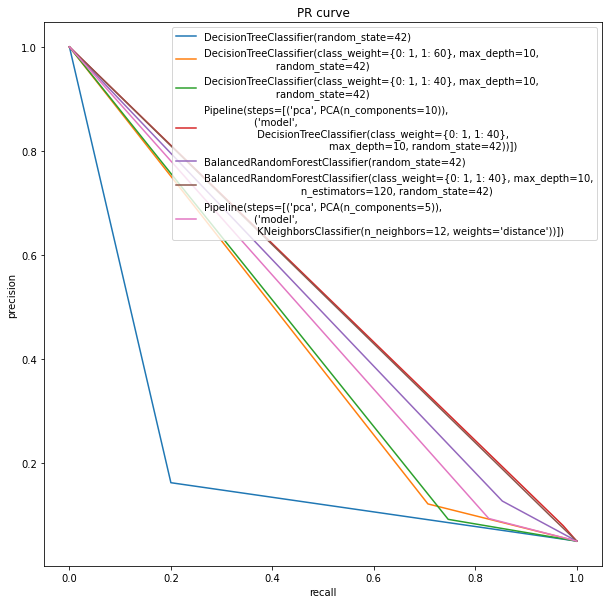

In [25]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score


plt.figure(figsize=(10, 10))
for model, model_name in zip(models, models):
    y_pred = model.predict(X_test)
    precision, recall, _ = precision_recall_curve(y_test, model.predict(X_test))
    ap = average_precision_score(y_test, model.predict(X_test))
    lab = model_name 
    plt.plot(recall, precision, label=lab)


plt.xlabel('recall')
plt.ylabel('precision')

plt.title("PR curve")
plt.legend()
plt.savefig(f'PR curve.jpg')
plt.show()

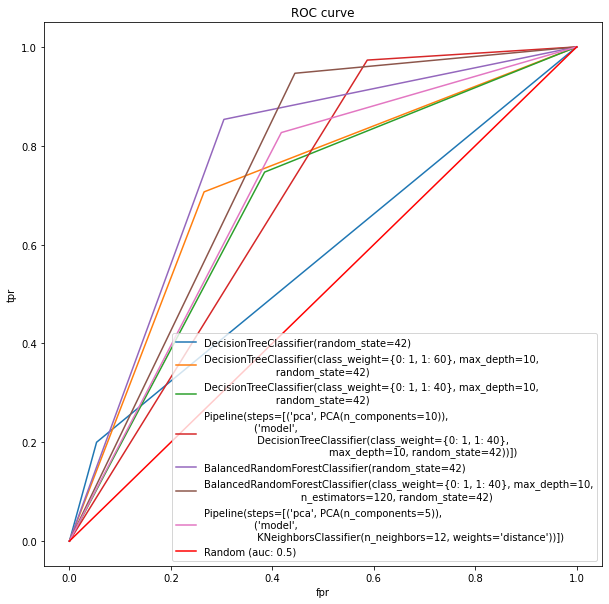

In [26]:
from sklearn.metrics import roc_curve, roc_auc_score


plt.figure(figsize=(10, 10))

for model, model_name in zip(models, models):
    y_pred = model.predict(X_test)
    fpr,tpr, _ = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    lab = model_name
    plt.plot(fpr, tpr, label=lab)

plt.xlabel('fpr')
plt.ylabel('tpr')
plt.plot([0, 1], [0, 1], label='Random (auc: 0.5)', color='red')
plt.title("ROC curve")
plt.legend()
plt.show()

In [27]:
for i in range(7):
    print(models[i])
    print("F1 score :")
    print( f1_scores[i])
    print("recall score :")
    print( recall_scores[i])


DecisionTreeClassifier(random_state=42)
F1 score :
0.9099804305283757
recall score :
0.2
DecisionTreeClassifier(class_weight={0: 1, 1: 60}, max_depth=10,
                       random_state=42)
F1 score :
0.7332028701891716
recall score :
0.7066666666666667
DecisionTreeClassifier(class_weight={0: 1, 1: 40}, max_depth=10,
                       random_state=42)
F1 score :
0.6216568819308546
recall score :
0.7466666666666667
Pipeline(steps=[('pca', PCA(n_components=10)),
                ('model',
                 DecisionTreeClassifier(class_weight={0: 1, 1: 40},
                                        max_depth=10, random_state=42))])
F1 score :
0.4403131115459882
recall score :
0.9733333333333334
BalancedRandomForestClassifier(random_state=42)
F1 score :
0.7031963470319634
recall score :
0.8533333333333334
BalancedRandomForestClassifier(class_weight={0: 1, 1: 40}, max_depth=10,
                               n_estimators=120, random_state=42)
F1 score :
0.5746901500326158
recall score 